<a href="https://colab.research.google.com/github/IsharaSilva/Prediction-Recommedation-system-for-Potato-Cultivation/blob/main/Detection_of_Healthy_Unhealthy_Leaves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import numpy as np # dataAnalysis
import pandas as pd #multidimensional arrays
import matplotlib.pyplot as plt #data visualization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage import img_as_ubyte
from skimage.util import img_as_float
import cv2


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
!git clone https://github.com/IsharaSilva/Prediction-Recommedation-system-for-Potato-Cultivation.git

fatal: destination path 'Prediction-Recommedation-system-for-Potato-Cultivation' already exists and is not an empty directory.


In [4]:
from google.colab import drive

In [27]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import os
path = os.listdir('/content/drive/MyDrive//Dataset/Training')
classes = {'Healthy':0, 'Unhealthy':1}

**Image preprocessing and segmentation**

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[13.61357114 30.30091044 17.51800401 23.3571311 ]]
Homogeneity: [[0.57120219 0.49180737 0.55264771 0.50059149]]
Energy: [[0.28963837 0.27863688 0.28773073 0.2841071 ]]
Correlation: [[0.98029113 0.95603838 0.97459616 0.96611315]]
Contrast: [[16.57519439 18.07473464 15.2098517  39.39055265]]
Homogeneity: [[0.72520182 0.69587677 0.72491119 0.68337823]]
Energy: [[0.56882475 0.5654308  0.56938132 0.56437539]]
Correlation: [[0.9877202  0.98662313 0.98872897 0.97084758]]
Contrast: [[17.43748297 22.60856784 18.95765932 43.38046835]]
Homogeneity: [[0.70089809 0.6666333  0.6975605  0.64847071]]
Energy: [[0.5325206  0.52860116 0.53232753 0.52540861]]
Correlation: [[0.98313719 0.97816376 0.98166712 0.95810144]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[ 8.53843687 15.63193722 12.18705812 21.32991835]]
Homogeneity: [[0.69922285 0.65001104 0.67668005 0.62632066]]
Energy: [[0.46142856 0.45569631 0.45965945 0.44942656]]
Correlation: [[0.99160643 0.98456482 0.98800248 0.97893791]]
Contrast: [[ 4.33616032 12.71210156  9.03332265 12.52416255]]
Homogeneity: [[0.74704719 0.69198909 0.72405933 0.69042863]]
Energy: [[0.49274428 0.48220191 0.48744055 0.48240031]]
Correlation: [[0.99726017 0.9919668  0.99430363 0.99208564]]
Contrast: [[10.79727054 23.60653572 18.42892585 28.00701202]]
Homogeneity: [[0.64974221 0.57124612 0.6070397  0.57004224]]
Energy: [[0.40297324 0.39353285 0.39939813 0.39339449]]
Correlation: [[0.9903571  0.97885497 0.98349016 0.97491264]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[ 8.58033267 14.00112449 10.01946693 18.46071703]]
Homogeneity: [[0.79814577 0.773711   0.78744083 0.74954088]]
Energy: [[0.65868143 0.65435065 0.65694757 0.64818347]]
Correlation: [[0.9889466  0.98171642 0.98699378 0.97589359]]
Contrast: [[19.14480561 42.32985008 18.61531864 26.4680182 ]]
Homogeneity: [[0.65113792 0.5948495  0.6520835  0.61552753]]
Energy: [[0.46474982 0.45704185 0.46431174 0.46078006]]
Correlation: [[0.98430767 0.96533318 0.98474126 0.97832354]]
Contrast: [[19.82393587 33.74629018 23.88573948 45.42664487]]
Homogeneity: [[0.64996429 0.60604467 0.64295487 0.60153051]]
Energy: [[0.4869767  0.4796607  0.48687362 0.47814628]]
Correlation: [[0.98217398 0.96966884 0.9785089  0.95917054]]
Contrast: [[ 9.2435511  20.1869872  14.58994389 21.54164843]]
Homogeneity: [[0.66707662 0.60040904 0.63618    0.59576197]]
Energy: [[0.40353373 0.39237183 0.39913071 0.39171484]]
Correlation: [[0.99275668 0.98411604 0.98852243 0.98305024]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[ 6.42768337 13.0306063   6.89109018 10.87253465]]
Homogeneity: [[0.68381193 0.63518879 0.68323126 0.63607591]]
Energy: [[0.41548142 0.40969959 0.4157708  0.40965375]]
Correlation: [[0.98981191 0.9792753  0.9890736  0.98270746]]
Contrast: [[11.65944689 21.44118297 19.27865731 34.23361352]]
Homogeneity: [[0.56957345 0.48836908 0.51285133 0.45887015]]
Energy: [[0.2228498  0.21482205 0.21688377 0.210779  ]]
Correlation: [[0.98913683 0.980025   0.9820807  0.96810721]]
Contrast: [[13.77421242 19.15189899 12.72151904 28.97718081]]
Homogeneity: [[0.67284486 0.63695904 0.67855462 0.62105417]]
Energy: [[0.46669272 0.46313134 0.46678954 0.46043699]]
Correlation: [[0.98418854 0.97803742 0.98539881 0.96676971]]
Contrast: [[13.6145491  21.58533098 12.39803206 25.5882386 ]]
Homogeneity: [[0.69702025 0.65238836 0.69154905 0.65162398]]
Energy: [[0.52277958 0.51406456 0.52172227 0.5148544 ]]
Correlation: [[0.97998069 0.96827719 0.98175735 0.96239433]]
Contrast: [[24.19737876 49.81213328 24.2

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[33.89965932 56.3169425  24.12625251 49.05275481]]
Homogeneity: [[0.66501389 0.62961586 0.67528518 0.63302196]]
Energy: [[0.5357097  0.52869155 0.53474527 0.5273932 ]]
Correlation: [[0.97829918 0.96398887 0.98455592 0.96863386]]
Contrast: [[ 7.70157114 11.44600222  5.15306613 12.33540428]]
Homogeneity: [[0.89177559 0.87557671 0.89184848 0.87369883]]
Energy: [[0.8216429  0.81568436 0.82023806 0.81545482]]
Correlation: [[0.97922513 0.96918192 0.98609968 0.96678723]]
Contrast: [[19.45971944 24.29206308 13.34982766 35.51715053]]
Homogeneity: [[0.6813448  0.65255908 0.69252998 0.64396912]]
Energy: [[0.50790013 0.50458183 0.50864697 0.50368549]]
Correlation: [[0.98594745 0.98247219 0.99035962 0.97437279]]
Contrast: [[19.49535471 24.66794109 17.36076152 38.91077144]]
Homogeneity: [[0.58596498 0.54234134 0.58686519 0.51489902]]
Energy: [[0.34098861 0.33512161 0.34187611 0.33201139]]
Correlation: [[0.98009442 0.97476793 0.98229687 0.96019944]]
Contrast:

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

 [[ 9.24637675 18.18121212  7.58737876 12.42443605]]
Homogeneity: [[0.50951709 0.42723684 0.51583649 0.44735156]]
Energy: [[0.09566909 0.08991487 0.09655732 0.09212314]]
Correlation: [[0.99062592 0.98154553 0.99230989 0.98738887]]
Contrast: [[21.55985571 45.1332083  22.85838076 35.22937659]]
Homogeneity: [[0.68593468 0.63857802 0.67723284 0.64536681]]
Energy: [[0.52138614 0.51527902 0.51961953 0.51353924]]
Correlation: [[0.98867128 0.97630797 0.9879889  0.98150684]]
Contrast: [[18.42205611 23.54600182 17.73819639 38.73426211]]
Homogeneity: [[0.58604545 0.536532   0.57717086 0.50775413]]
Energy: [[0.316438   0.31090157 0.31644515 0.30741411]]
Correlation: [[0.9833758  0.97872177 0.98399771 0.96499594]]
Contrast: [[10.79311824 21.72072    16.94753908 27.27227601]]
Homogeneity: [[0.65306399 0.56792737 0.60167259 0.56635993]]
Energy: [[0.39032532 0.3815374  0.38563261 0.3801984 ]]
Correlation: [[0.98930617 0.9784505  0.98320988 0.97294291]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[20.42335872 44.12160192 19.66842485 28.60394135]]
Homogeneity: [[0.62720296 0.56857622 0.6254827  0.59060844]]
Energy: [[0.41048703 0.40455768 0.4099231  0.40663902]]
Correlation: [[0.98698101 0.97189784 0.98746202 0.98178146]]
Contrast: [[14.43539479 22.50315059 12.52358317 26.57719045]]
Homogeneity: [[0.76643304 0.73812111 0.76365773 0.72612122]]
Energy: [[0.62607857 0.62051315 0.62451011 0.61744981]]
Correlation: [[0.98846312 0.98204207 0.98999106 0.97879091]]
Contrast: [[ 9.24938677 12.1504251   9.11686974 21.46060458]]
Homogeneity: [[0.82996242 0.80686641 0.82353043 0.7946505 ]]
Energy: [[0.64547187 0.64248662 0.64389222 0.6387745 ]]
Correlation: [[0.99428576 0.99248897 0.99439156 0.98673357]]
Contrast: [[ 8.53489379 14.6112104   9.4556994  16.15207971]]
Homogeneity: [[0.76393328 0.72476189 0.75608578 0.71648575]]
Energy: [[0.59803721 0.59237577 0.59863593 0.59007838]]
Correlation: [[0.98587035 0.97579168 0.98437131 0.97323839]]
Contrast: [[18.55419238 24.20757346 17.9

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[15.59424449 23.64178457 19.61062926 36.54589741]]
Homogeneity: [[0.56049863 0.48375448 0.53355235 0.47324383]]
Energy: [[0.23738229 0.23132743 0.2353883  0.2271435 ]]
Correlation: [[0.98425174 0.97605349 0.98012648 0.962983  ]]
Contrast: [[16.85547896 23.13667415 17.68051303 36.45436364]]
Homogeneity: [[0.61627375 0.56796921 0.60336429 0.53996603]]
Energy: [[0.36123836 0.35468459 0.36037945 0.35162169]]
Correlation: [[0.98492529 0.9792672  0.98418414 0.96733309]]
Contrast: [[17.61462525 45.62986896 25.39824048 31.9406669 ]]
Homogeneity: [[0.73060538 0.68506134 0.71625317 0.68989198]]
Energy: [[0.59252984 0.58354463 0.5910705  0.58330333]]
Correlation: [[0.9872947  0.96709996 0.98166848 0.97696978]]
Contrast: [[17.55422044 23.71922603 16.29847295 30.31545255]]
Homogeneity: [[0.76262552 0.71436746 0.74337679 0.70746066]]
Energy: [[0.44315267 0.43767076 0.44174874 0.43437152]]
Correlation: [[0.99462597 0.99272922 0.99500622 0.99070729]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[16.67229659 26.65927446 14.70349499 27.03654604]]
Homogeneity: [[0.76646316 0.73872395 0.77823203 0.73499665]]
Energy: [[0.60187901 0.59787897 0.60378142 0.59551377]]
Correlation: [[0.98376377 0.9739823  0.98566385 0.97361416]]
Contrast: [[24.97298196 43.34891426 25.4158998  44.15640901]]
Homogeneity: [[0.4817069  0.40044157 0.46308919 0.3996727 ]]
Energy: [[0.16074489 0.15076823 0.15774721 0.15294069]]
Correlation: [[0.98338872 0.97113413 0.98312397 0.97059673]]
Contrast: [[15.97311423 28.69951526 16.40242084 30.21807945]]
Homogeneity: [[0.72698834 0.68690865 0.72105794 0.68654685]]
Energy: [[0.56289872 0.55753099 0.56214753 0.55805335]]
Correlation: [[0.99000936 0.98206898 0.9897409  0.98112021]]
Contrast: [[16.0987495  30.25909534 23.90126653 39.87839808]]
Homogeneity: [[0.58217737 0.51254395 0.55198765 0.49787847]]
Energy: [[0.31859941 0.30726848 0.31412874 0.3053399 ]]
Correlation: [[0.98275132 0.96746182 0.97436439 0.9571187 ]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[11.72286573 15.17875029 13.05312625 25.7969727 ]]
Homogeneity: [[0.89006567 0.86996456 0.89031478 0.87075277]]
Energy: [[0.76440043 0.76324261 0.76380435 0.76165395]]
Correlation: [[0.99246968 0.99023788 0.99161633 0.98340866]]
Contrast: [[ 8.87121042 13.21289071  9.91327054 16.22825611]]
Homogeneity: [[0.91384642 0.89882216 0.91063588 0.89906062]]
Energy: [[0.82696667 0.82610513 0.82702337 0.8252548 ]]
Correlation: [[0.99155803 0.98734467 0.99052945 0.98445643]]
Contrast: [[17.44662525 32.52740752 20.08957916 35.06743748]]
Homogeneity: [[0.66769727 0.62489762 0.66376154 0.61600019]]
Energy: [[0.45032905 0.44463692 0.45049858 0.44373722]]
Correlation: [[0.99057401 0.98243923 0.98914181 0.98106792]]
Contrast: [[ 9.62832866 15.36941619  6.15732265 12.98810848]]
Homogeneity: [[0.87768173 0.85681829 0.8755601  0.86214555]]
Energy: [[0.81189154 0.80597179 0.81024144 0.8062373 ]]
Correlation: [[0.97192086 0.9552576  0.98204337 0.96218991]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[ 8.85457715 18.67016598  9.90922244 15.39114301]]
Homogeneity: [[0.61091215 0.55633185 0.61290518 0.55812042]]
Energy: [[0.29525936 0.28930398 0.29544689 0.2905707 ]]
Correlation: [[0.99109393 0.98117249 0.99002606 0.98447914]]
Contrast: [[11.14111824 23.70321003 10.52248898 15.6922663 ]]
Homogeneity: [[0.67421093 0.62775911 0.68557129 0.63542291]]
Energy: [[0.44720235 0.44039083 0.44835489 0.4420681 ]]
Correlation: [[0.99155923 0.98203109 0.99202121 0.98810412]]
Contrast: [[ 8.41403206 15.73656331 11.43945892 17.19671005]]
Homogeneity: [[0.82671627 0.77976222 0.80374689 0.78074116]]
Energy: [[0.62974203 0.62375628 0.62612793 0.62162795]]
Correlation: [[0.99385636 0.98847091 0.99165196 0.98740151]]
Contrast: [[ 8.9297996  13.46707845  8.76683768 14.34635604]]
Homogeneity: [[0.86847042 0.8365545  0.85693724 0.840435  ]]
Energy: [[0.64408816 0.64258424 0.64367356 0.63948475]]
Correlation: [[0.99658394 0.99483865 0.9966444  0.99450167]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[25.29747896 42.00781121 20.17117034 39.52615853]]
Homogeneity: [[0.58334484 0.52784335 0.59039801 0.53326728]]
Energy: [[0.36783214 0.35682362 0.36800037 0.35805211]]
Correlation: [[0.98214725 0.97038882 0.98576507 0.97213811]]
Contrast: [[ 8.38434068 11.71569592  8.58787174 17.73564363]]
Homogeneity: [[0.70829314 0.6681173  0.69672211 0.64567678]]
Energy: [[0.47134514 0.4649965  0.46851593 0.45916342]]
Correlation: [[0.99360688 0.99104947 0.99345528 0.98645048]]
Contrast: [[17.2579479  35.37363705 16.84737074 25.93228541]]
Homogeneity: [[0.72977076 0.68548613 0.72471535 0.70094904]]
Energy: [[0.58187324 0.57532186 0.58090278 0.57756661]]
Correlation: [[0.98742057 0.97424288 0.98771983 0.98111755]]
Contrast: [[19.73268136 43.22196698 23.17113026 34.55478894]]
Homogeneity: [[0.69413699 0.63710186 0.67588755 0.65029524]]
Energy: [[0.51937614 0.51543113 0.51869098 0.5149495 ]]
Correlation: [[0.99054463 0.97930607 0.98889703 0.98345577]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[12.71408016 22.56738326 18.6231503  33.46680937]]
Homogeneity: [[0.60743553 0.56360416 0.59550941 0.52682203]]
Energy: [[0.33135991 0.32390892 0.3284398  0.32162398]]
Correlation: [[0.98838886 0.9792671  0.98290402 0.96925437]]
Contrast: [[ 7.95859319 15.0957466  13.24377956 22.46189373]]
Homogeneity: [[0.66206898 0.59400788 0.62962533 0.58303398]]
Energy: [[0.38355809 0.37618876 0.38071774 0.37330546]]
Correlation: [[0.99287467 0.98644995 0.98811484 0.9798382 ]]
Contrast: [[ 8.53003607 16.6401139  14.92045291 24.79157513]]
Homogeneity: [[0.65449903 0.58129084 0.61758466 0.57052423]]
Energy: [[0.36846536 0.36048573 0.36447087 0.35779397]]
Correlation: [[0.99265937 0.98564731 0.98713156 0.97861643]]
Contrast: [[ 7.68117435 23.6747242  20.78293788 28.5901663 ]]
Homogeneity: [[0.76876284 0.71174546 0.73316618 0.70567686]]
Energy: [[0.58998364 0.57835114 0.58042798 0.57592137]]
Correlation: [[0.99216237 0.9757994  0.97877305 0.97077477]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[10.25059319 16.75532227 10.5572024  21.68246312]]
Homogeneity: [[0.63688659 0.58485866 0.63610897 0.57496777]]
Energy: [[0.28956312 0.28738242 0.29017637 0.28649495]]
Correlation: [[0.99537479 0.99242459 0.99522955 0.99019687]]
Contrast: [[ 4.13088176 10.75296083  6.43302204  9.47322702]]
Homogeneity: [[0.74160302 0.69478132 0.7387126  0.69505328]]
Energy: [[0.45896013 0.45169439 0.45666719 0.45200812]]
Correlation: [[0.99791011 0.99456184 0.99675445 0.99520907]]
Contrast: [[18.54975952 38.91125337 20.23591984 30.84185606]]
Homogeneity: [[0.70985416 0.66108427 0.69975299 0.67133864]]
Energy: [[0.57215278 0.56233225 0.56942729 0.56429897]]
Correlation: [[0.98337699 0.96517552 0.9818662  0.97239738]]
Contrast: [[ 9.60525451 17.48950004 12.98360721 21.40854454]]
Homogeneity: [[0.80798297 0.77397993 0.79010609 0.76414959]]
Energy: [[0.66992865 0.66424298 0.66617672 0.66070106]]
Correlation: [[0.98938944 0.98061019 0.98563633 0.97626532]]
Contrast: [[20.48577555 36.05077891 21.5

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[ 8.68248497 11.81047064  8.90638477 17.86098449]]
Homogeneity: [[0.80143086 0.77561864 0.79417608 0.75302003]]
Energy: [[0.60955844 0.60575302 0.60794014 0.59949724]]
Correlation: [[0.99396688 0.99177219 0.99382179 0.98755742]]
Contrast: [[ 8.48232064 17.28011132  8.78922645 13.94702029]]
Homogeneity: [[0.58971292 0.51231561 0.57591591 0.50957845]]
Energy: [[0.2247386  0.21654121 0.22343909 0.21627521]]
Correlation: [[0.99307107 0.98588461 0.99282017 0.98860728]]
Contrast: [[18.20192385 27.28950085 18.0319479  38.05464235]]
Homogeneity: [[0.67978814 0.63706007 0.67450013 0.62832082]]
Energy: [[0.51391637 0.50535337 0.51344278 0.50490043]]
Correlation: [[0.98241064 0.9736656  0.98257709 0.96327719]]
Contrast: [[14.62868537 20.8794543  16.97842886 33.49123899]]
Homogeneity: [[0.68736212 0.64145667 0.67036246 0.62322371]]
Energy: [[0.46117978 0.45654828 0.46020359 0.45431039]]
Correlation: [[0.99082001 0.98687851 0.98937029 0.97895307]]
Contrast: [[19.16054509 48.38560488 29.2

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[18.05972745 25.85794836 18.85245691 41.5896643 ]]
Homogeneity: [[0.71782708 0.68704496 0.71447064 0.66815391]]
Energy: [[0.5632511  0.55696539 0.56208813 0.5535003 ]]
Correlation: [[0.98479081 0.97824912 0.98411984 0.96501611]]
Contrast: [[16.39766733 31.28215549 16.05562325 27.46455637]]
Homogeneity: [[0.76079616 0.72489867 0.75238911 0.72392846]]
Energy: [[0.63600888 0.63047393 0.6342402  0.62745318]]
Correlation: [[0.98683732 0.97492448 0.98711189 0.97798464]]
Contrast: [[14.72273347 38.0450199  23.16618838 31.33851671]]
Homogeneity: [[0.73146715 0.68209304 0.70946171 0.67923382]]
Energy: [[0.57355677 0.56524173 0.57001918 0.56403633]]
Correlation: [[0.98702661 0.96652058 0.97958641 0.97242227]]
Contrast: [[21.1432986  36.43503038 19.28430862 36.29868153]]
Homogeneity: [[0.68783078 0.64839641 0.68946147 0.64708944]]
Energy: [[0.49278842 0.48405108 0.49136502 0.48505991]]
Correlation: [[0.99039302 0.9834637  0.99123755 0.98352559]]
Contrast: [[18.72109018 29.95923711 15.8

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[17.5509499  23.40451645 17.85301002 37.63957173]]
Homogeneity: [[0.5971294  0.54814861 0.58458798 0.51710771]]
Energy: [[0.33425799 0.32821959 0.33388136 0.3248973 ]]
Correlation: [[0.98377119 0.97830854 0.98349167 0.96511523]]
Contrast: [[21.44594389 45.676676   21.87416032 32.52276898]]
Homogeneity: [[0.67137909 0.62014733 0.6658529  0.63115189]]
Energy: [[0.49615139 0.48762893 0.49460238 0.48916318]]
Correlation: [[0.98630678 0.97086632 0.98603367 0.9792562 ]]
Contrast: [[14.2351984  30.91267103 11.97621643 15.74873193]]
Homogeneity: [[0.82499711 0.79280946 0.82353163 0.80549466]]
Energy: [[0.72112797 0.7150986  0.71972121 0.71605688]]
Correlation: [[0.98681744 0.97141621 0.98890938 0.98543773]]
Contrast: [[15.86956313 32.34490625 14.46551503 22.12878663]]
Homogeneity: [[0.74935549 0.7121463  0.74517961 0.71769739]]
Energy: [[0.62391646 0.61823654 0.62305098 0.61906172]]
Correlation: [[0.97816782 0.95556452 0.9800994  0.96959944]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[11.87566333 20.72270392  7.56346293 14.38929964]]
Homogeneity: [[0.73062671 0.69029328 0.75813532 0.71768585]]
Energy: [[0.55486239 0.54775105 0.55968389 0.55397248]]
Correlation: [[0.99054624 0.98342475 0.99396702 0.98849044]]
Contrast: [[10.6148016  15.94908454 13.67986373 27.73274003]]
Homogeneity: [[0.67108339 0.63169425 0.64942909 0.59659716]]
Energy: [[0.44594924 0.44146551 0.44316453 0.43547931]]
Correlation: [[0.98824776 0.98233008 0.98488597 0.96927485]]
Contrast: [[20.14287776 33.13687094 14.14306212 25.9190445 ]]
Homogeneity: [[0.75293515 0.72754217 0.77065649 0.71699558]]
Energy: [[0.53345452 0.52905192 0.53614725 0.52741347]]
Correlation: [[0.98737266 0.97922947 0.9911366  0.9837537 ]]
Contrast: [[ 8.80151904 15.92431356 10.7702004  17.63006574]]
Homogeneity: [[0.74642133 0.69660449 0.72638074 0.68754495]]
Energy: [[0.55878141 0.55243376 0.55740556 0.54973745]]
Correlation: [[0.9861315  0.97482889 0.98301515 0.97213246]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[19.64133066 40.69217794 20.58862124 31.61176461]]
Homogeneity: [[0.57672732 0.5053862  0.56941509 0.52056818]]
Energy: [[0.32327551 0.31220974 0.32240964 0.31385485]]
Correlation: [[0.98415517 0.96721395 0.98339351 0.97453012]]
Contrast: [[ 6.32643687  7.40012289  6.18476954 13.72518986]]
Homogeneity: [[0.91145066 0.88637344 0.89236891 0.87822789]]
Energy: [[0.79691055 0.79464309 0.79528312 0.79275327]]
Correlation: [[0.99223895 0.99090758 0.99241271 0.98313598]]
Contrast: [[11.21886573 21.89706869 18.19605611 30.07893543]]
Homogeneity: [[0.63770017 0.55760905 0.5938892  0.55492465]]
Energy: [[0.37531333 0.36652409 0.37170341 0.36553871]]
Correlation: [[0.98916201 0.97877695 0.98235989 0.97084699]]
Contrast: [[16.2116994  31.11207586 23.79304609 41.30057309]]
Homogeneity: [[0.67527828 0.63384621 0.66201329 0.61673231]]
Energy: [[0.48720084 0.48024451 0.48548508 0.4764828 ]]
Correlation: [[0.98663551 0.97437418 0.98038056 0.96598228]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[4.00337475 9.36842422 5.89414028 8.03202798]]
Homogeneity: [[0.83023726 0.78423626 0.80610304 0.78523367]]
Energy: [[0.65787026 0.65288495 0.65592304 0.6531456 ]]
Correlation: [[0.99634247 0.99142904 0.99461196 0.99265183]]
Contrast: [[16.20462525 28.18099927 20.34508617 36.31674973]]
Homogeneity: [[0.47584075 0.38958323 0.44187316 0.37411218]]
Energy: [[0.095399   0.08975633 0.0932799  0.08841753]]
Correlation: [[0.98537213 0.97450259 0.98160568 0.96714158]]
Contrast: [[15.56064128 33.71816579 21.800998   33.70409356]]
Homogeneity: [[0.6690853  0.61357023 0.65268436 0.61433634]]
Energy: [[0.49048519 0.48146646 0.48686452 0.48067731]]
Correlation: [[0.9852574  0.96809135 0.97942482 0.96810469]]
Contrast: [[12.03832064 17.33709503 13.49776754 28.17585873]]
Homogeneity: [[0.71396634 0.67794825 0.71320808 0.66459756]]
Energy: [[0.54232169 0.5380956  0.54345034 0.53406231]]
Correlation: [[0.97705793 0.96666665 0.97401364 0.94582737]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[3.97816834 6.71744692 2.43645291 4.78765547]]
Homogeneity: [[0.91358263 0.89867509 0.91890018 0.903056  ]]
Energy: [[0.82839035 0.82577957 0.82964582 0.82775912]]
Correlation: [[0.99355394 0.98906901 0.99605714 0.99220863]]
Contrast: [[16.40127455 21.27509126 18.40926253 41.58261613]]
Homogeneity: [[0.68200419 0.64750459 0.67546544 0.62798339]]
Energy: [[0.49277373 0.49028659 0.49272183 0.4878148 ]]
Correlation: [[0.98566846 0.98142767 0.98391363 0.96369999]]
Contrast: [[17.23174349 24.13339705 20.4701002  43.74060345]]
Homogeneity: [[0.67863821 0.64249268 0.6716697  0.62823791]]
Energy: [[0.50533471 0.49905849 0.50447931 0.49731741]]
Correlation: [[0.98615226 0.98062884 0.98354921 0.96489072]]
Contrast: [[17.97163126 28.41169714 20.12197595 35.78361131]]
Homogeneity: [[0.52879598 0.47431696 0.5403062  0.46051909]]
Energy: [[0.26235985 0.25521567 0.26280839 0.25454128]]
Correlation: [[0.97557453 0.96125309 0.97262639 0.9512003 ]]
Contrast: [[16.60113427 30.57607399 21.32821

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[23.13059719 39.03245368 15.05734669 30.75820981]]
Homogeneity: [[0.64965828 0.60286777 0.65616704 0.61360402]]
Energy: [[0.45530193 0.45093078 0.45555465 0.45177096]]
Correlation: [[0.98459608 0.97401012 0.98998419 0.97952003]]
Contrast: [[11.15305812 19.75624194 13.63263327 22.42464488]]
Homogeneity: [[0.71568318 0.66989117 0.69299882 0.64562695]]
Energy: [[0.4824504  0.47775365 0.48063986 0.4716295 ]]
Correlation: [[0.99191609 0.98567441 0.99015806 0.98373953]]
Contrast: [[14.22961924 26.93825728 13.74973948 23.85072349]]
Homogeneity: [[0.53207268 0.46739317 0.5350177  0.46760362]]
Energy: [[0.17265123 0.1666646  0.17235614 0.16815552]]
Correlation: [[0.98858722 0.9783855  0.9889754  0.98086285]]
Contrast: [[18.89032866 28.79898474 11.08467335 22.99581126]]
Homogeneity: [[0.76057111 0.73975006 0.78366993 0.72789765]]
Energy: [[0.55647498 0.55296602 0.56034546 0.55105305]]
Correlation: [[0.98724442 0.98052783 0.99251756 0.98445168]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[11.11513026 19.45041185 15.78896192 27.20561765]]
Homogeneity: [[0.69569791 0.64590249 0.66765978 0.62316716]]
Energy: [[0.44578121 0.44229916 0.4455365  0.43824406]]
Correlation: [[0.99162895 0.98530251 0.98809445 0.97944261]]
Contrast: [[ 7.58695792 14.65878852  8.10703407 12.94808856]]
Homogeneity: [[0.7849487  0.74967817 0.77900922 0.74611789]]
Energy: [[0.63236593 0.62556109 0.63086035 0.62448964]]
Correlation: [[0.98966238 0.97989607 0.98890557 0.98224265]]
Contrast: [[16.84562325 41.00008032 16.29317836 19.50707427]]
Homogeneity: [[0.74320321 0.69517118 0.73867671 0.71440397]]
Energy: [[0.57286397 0.5654474  0.57089847 0.56808204]]
Correlation: [[0.99119577 0.97859795 0.99148478 0.9898173 ]]
Contrast: [[15.36163527 23.19280244  9.73911423 23.34973354]]
Homogeneity: [[0.76754742 0.74004163 0.77348527 0.74104245]]
Energy: [[0.62822245 0.62232117 0.62822339 0.62350772]]
Correlation: [[0.98651622 0.97967266 0.99145146 0.97953512]]
Contrast: [[15.91179158 30.35468131 16.7

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Contrast: [[19.11793988 31.25692668 17.10336673 33.62879667]]
Homogeneity: [[0.7464705  0.72084269 0.75222073 0.71270333]]
Energy: [[0.63939121 0.63235093 0.64071712 0.6297237 ]]
Correlation: [[0.97307353 0.95600469 0.97588944 0.95266619]]
Contrast: [[16.54252906 25.80273975 15.78401202 33.01401199]]
Homogeneity: [[0.66276393 0.61716675 0.66208789 0.61489865]]
Energy: [[0.46501931 0.45819151 0.4647126  0.45896791]]
Correlation: [[0.98137064 0.97097096 0.98222334 0.96285805]]
Contrast: [[ 7.85514228  8.18997112  7.85764729 20.00230923]]
Homogeneity: [[0.87284422 0.86124847 0.87834711 0.85130292]]
Energy: [[0.79133915 0.78826399 0.79312897 0.78471272]]
Correlation: [[0.98418685 0.98353084 0.98417006 0.95977749]]
Contrast: [[12.5364489  16.48510247 12.15453307 27.8530769 ]]
Homogeneity: [[0.62459118 0.5833277  0.62075064 0.55825277]]
Energy: [[0.34355493 0.33757425 0.34286904 0.33420967]]
Correlation: [[0.99197672 0.98943698 0.99224119 0.98215299]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[10.19452505 18.83522556  9.57852505 16.45805439]]
Homogeneity: [[0.82285622 0.79497723 0.81677386 0.79160701]]
Energy: [[0.73482301 0.72735105 0.73327116 0.724891  ]]
Correlation: [[0.96212311 0.93013893 0.9644118  0.93895601]]
Contrast: [[10.30511824 26.95450621 13.8046493  16.92592801]]
Homogeneity: [[0.69542276 0.64885623 0.69586555 0.65522673]]
Energy: [[0.49197797 0.48872457 0.49241807 0.49026619]]
Correlation: [[0.98973878 0.97318074 0.98625397 0.983159  ]]
Contrast: [[10.75623246 16.51686941 13.02142285 25.87046237]]
Homogeneity: [[0.66399252 0.61773254 0.65228085 0.60062735]]
Energy: [[0.42400402 0.42046155 0.42376276 0.4150256 ]]
Correlation: [[0.98985586 0.98435009 0.98767902 0.975488  ]]
Contrast: [[16.41859319 36.4025285  19.27427255 28.12169429]]
Homogeneity: [[0.72612099 0.68125755 0.71964595 0.6949073 ]]
Energy: [[0.581254   0.5722702  0.57884993 0.57393107]]
Correlation: [[0.98754322 0.97242087 0.98540027 0.97869456]]
Contrast: [[19.10176754 23.61045136 13.4

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[16.85101804 30.84126971 16.19411222 27.03685527]]
Homogeneity: [[0.50563641 0.39899179 0.46847461 0.40843035]]
Energy: [[0.07173825 0.06269309 0.06815292 0.06364153]]
Correlation: [[0.987833   0.97772578 0.9883237  0.98047342]]
Contrast: [[ 9.82967535 27.24464962 15.53155511 18.6338328 ]]
Homogeneity: [[0.79411297 0.74805302 0.77327853 0.7494552 ]]
Energy: [[0.66900926 0.65732187 0.66358495 0.65667582]]
Correlation: [[0.98428509 0.95638939 0.97509895 0.97017211]]
Contrast: [[12.62574349 25.82794848 16.11003607 26.78379203]]
Homogeneity: [[0.62120733 0.56662924 0.60674808 0.55957285]]
Energy: [[0.36934673 0.36531558 0.36957622 0.3649294 ]]
Correlation: [[0.99091225 0.98139874 0.98839376 0.98071033]]
Contrast: [[4.95813627 8.90977948 5.55257315 9.87591214]]
Homogeneity: [[0.87844058 0.86067524 0.87230365 0.85497464]]
Energy: [[0.79812631 0.79558763 0.7976785  0.79417918]]
Correlation: [[0.98961053 0.9812974  0.98843235 0.97926792]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[15.05728257 34.28464143 15.40840882 21.28237236]]
Homogeneity: [[0.69946653 0.65130479 0.69286516 0.6600776 ]]
Energy: [[0.52567626 0.51807566 0.52465241 0.51981436]]
Correlation: [[0.98179005 0.95858833 0.98136541 0.97429349]]
Contrast: [[17.2212986  32.39795824 16.91358317 27.56917442]]
Homogeneity: [[0.50182503 0.4088843  0.48583014 0.42059356]]
Energy: [[0.07469101 0.06784133 0.07307595 0.06830796]]
Correlation: [[0.9895792  0.98039442 0.98977649 0.9833165 ]]
Contrast: [[17.97212024 37.88819724 18.4826012  28.7608363 ]]
Homogeneity: [[0.6967302  0.65383842 0.69473153 0.66164575]]
Energy: [[0.52864942 0.52293403 0.52922188 0.52277334]]
Correlation: [[0.9869749  0.97257398 0.98660496 0.97918098]]
Contrast: [[14.98046493 21.85733391 18.5448497  39.50324697]]
Homogeneity: [[0.73268339 0.70141488 0.72211367 0.68540248]]
Energy: [[0.58008919 0.57666723 0.57972373 0.57588078]]
Correlation: [[0.9898037  0.98514117 0.98737759 0.9731453 ]]
Contrast: [[ 6.82025651  8.21643287  4.6

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[ 8.94809218 14.82075574  8.9617515  14.52835129]]
Homogeneity: [[0.8465829  0.81646084 0.83941492 0.81771144]]
Energy: [[0.70748857 0.70352065 0.70730832 0.70442792]]
Correlation: [[0.99162316 0.98609658 0.99162355 0.98637054]]
Contrast: [[11.21448898 18.62777258 13.69311423 24.03242557]]
Homogeneity: [[0.70876865 0.66443518 0.69211547 0.64407479]]
Energy: [[0.50212074 0.49660572 0.50097905 0.49144749]]
Correlation: [[0.99100607 0.98505869 0.98905791 0.9807234 ]]
Contrast: [[14.83056914 28.20191485 22.95283768 37.19868193]]
Homogeneity: [[0.57758124 0.48552914 0.52759697 0.47938603]]
Energy: [[0.24661712 0.23660976 0.24433437 0.23618441]]
Correlation: [[0.98650979 0.97430002 0.97911994 0.96610146]]
Contrast: [[28.36743888 66.5840579  30.64866132 41.36199051]]
Homogeneity: [[0.66134439 0.61164838 0.65507226 0.62862921]]
Energy: [[0.5123831  0.50560112 0.51113854 0.50559823]]
Correlation: [[0.98555852 0.96613693 0.98439737 0.97896428]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[11.90335471 25.14133678 13.55339078 17.91000036]]
Homogeneity: [[0.81601694 0.78635607 0.81326069 0.78466477]]
Energy: [[0.64573638 0.64045252 0.64547134 0.64050523]]
Correlation: [[0.99007895 0.97901474 0.98869665 0.98505078]]
Contrast: [[17.04441683 43.77443464 21.45787575 26.63717816]]
Homogeneity: [[0.70651098 0.65984705 0.69718717 0.66757205]]
Energy: [[0.53711473 0.53121405 0.53689374 0.5312154 ]]
Correlation: [[0.99090535 0.97667021 0.98855058 0.98580359]]
Contrast: [[13.76929058 24.50797386 13.0951503  23.93979141]]
Homogeneity: [[0.69137575 0.64133232 0.68049661 0.64053963]]
Energy: [[0.49587447 0.49065376 0.49560227 0.48976571]]
Correlation: [[0.98347185 0.97061761 0.98428116 0.97129881]]
Contrast: [[3.50292184 8.26507122 5.90843287 8.79527793]]
Homogeneity: [[0.84576495 0.81589849 0.83349416 0.80999267]]
Energy: [[0.72408882 0.7173521  0.72045185 0.71627233]]
Correlation: [[0.99207455 0.98123298 0.98659607 0.98002906]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[11.18918236 19.76583628 16.00718236 27.83802475]]
Homogeneity: [[0.65096242 0.58275122 0.62058496 0.57352287]]
Energy: [[0.38886097 0.38150385 0.38683077 0.37921607]]
Correlation: [[0.99009496 0.98248715 0.98582347 0.97533484]]
Contrast: [[ 7.9780521  13.74167975 10.35859719 18.03141353]]
Homogeneity: [[0.76211541 0.71625002 0.73510066 0.70366989]]
Energy: [[0.5703861  0.56289323 0.56637963 0.55807169]]
Correlation: [[0.99427835 0.99008618 0.99255809 0.98699174]]
Contrast: [[19.99681764 39.55683712 17.45486172 27.0254256 ]]
Homogeneity: [[0.64128729 0.58443076 0.63770878 0.59626199]]
Energy: [[0.45558478 0.44233059 0.45441682 0.44492953]]
Correlation: [[0.97822931 0.95699168 0.98099715 0.9706165 ]]
Contrast: [[18.66027255 45.47005434 20.0381523  25.05969454]]
Homogeneity: [[0.70100945 0.6431316  0.69081467 0.66178476]]
Energy: [[0.49407163 0.48219575 0.49203707 0.48548946]]
Correlation: [[0.98887449 0.97292801 0.98805305 0.98507995]]
Contrast: [[15.71438878 24.01636138 12.9

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag


Correlation: [[0.98673733 0.9797569  0.98904373 0.97660682]]
Contrast: [[11.93647695 20.91185176  9.55639279 18.36567725]]
Homogeneity: [[0.6271336  0.55609344 0.62148928 0.56851319]]
Energy: [[0.31405947 0.30813755 0.31316574 0.30882854]]
Correlation: [[0.9955282  0.99216462 0.99641889 0.99311863]]
Contrast: [[18.89338677 24.19395906 17.33954309 38.33356091]]
Homogeneity: [[0.5929468  0.54905229 0.59262063 0.5212064 ]]
Energy: [[0.34429232 0.338703   0.34519413 0.33524451]]
Correlation: [[0.98163725 0.97644821 0.9831675  0.96268394]]
Contrast: [[23.70540281 44.89296429 21.59393587 36.35911101]]
Homogeneity: [[0.57824399 0.51428763 0.57594404 0.5242196 ]]
Energy: [[0.34749925 0.33813868 0.34711672 0.33811545]]
Correlation: [[0.98538862 0.97235948 0.98670969 0.97761373]]
Contrast: [[16.58599198 31.90561484 14.64609218 24.17963783]]
Homogeneity: [[0.63604136 0.57858973 0.63674221 0.58706528]]
Energy: [[0.40217044 0.39519615 0.40259777 0.39585405]]
Correlation: [[0.98422993 0.96970742 0.

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Contrast: [[16.42028858 23.94752632 15.05674148 30.77927799]]
Homogeneity: [[0.63459008 0.58290068 0.62540859 0.57398471]]
Energy: [[0.39727843 0.38911283 0.39695204 0.38892772]]
Correlation: [[0.97823315 0.96817551 0.98001069 0.95909623]]
Contrast: [[ 9.292998   15.09538114  9.72613226 17.50359637]]
Homogeneity: [[0.76096492 0.72193214 0.75243196 0.71119296]]
Energy: [[0.5858931  0.58056466 0.58644124 0.57796043]]
Correlation: [[0.98736849 0.97945655 0.98680568 0.97617893]]
Contrast: [[11.00547495 19.59958394 12.87113828 23.20916783]]
Homogeneity: [[0.60887016 0.54649015 0.5941807  0.53698263]]
Energy: [[0.32377093 0.31489693 0.32270358 0.31652813]]
Correlation: [[0.99028062 0.98266614 0.9886512  0.97947448]]
Contrast: [[17.65715832 35.44381348 17.13987174 27.15060582]]
Homogeneity: [[0.74006144 0.70001462 0.73920437 0.71040115]]
Energy: [[0.61818828 0.60812285 0.61726568 0.61101297]]
Correlation: [[0.98236811 0.96465714 0.98288593 0.97292671]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[ 7.59268537 12.44069301  6.24468136 13.2304047 ]]
Homogeneity: [[0.7407814  0.69651339 0.74384982 0.70378064]]
Energy: [[0.51213256 0.50996654 0.51247958 0.50992666]]
Correlation: [[0.99071258 0.98479355 0.99236078 0.98382849]]
Contrast: [[11.47870942 28.89579158 12.05481764 14.1832322 ]]
Homogeneity: [[0.68098005 0.61338013 0.66648679 0.63238611]]
Energy: [[0.41553681 0.41113204 0.41510943 0.41271765]]
Correlation: [[0.99163657 0.97895253 0.99121654 0.98966902]]
Contrast: [[17.76578758 33.19845703 21.66202405 38.21244895]]
Homogeneity: [[0.6946173  0.655088   0.68337243 0.64234301]]
Energy: [[0.53488194 0.52815416 0.53426108 0.526593  ]]
Correlation: [[0.98510786 0.97220032 0.9818383  0.9680017 ]]
Contrast: [[21.36011222 50.42590592 25.03391182 33.62726656]]
Homogeneity: [[0.7382396  0.69941083 0.72922654 0.70820344]]
Energy: [[0.6268757  0.62060833 0.62492914 0.61944326]]
Correlation: [[0.98152454 0.95644208 0.97834691 0.97095275]]
Contrast: [[ 4.46442084 11.77545472  7.9

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Contrast: [[10.74806814 27.37309489 12.06410822 13.5582588 ]]
Homogeneity: [[0.73275122 0.68564684 0.72643328 0.69489257]]
Energy: [[0.55183795 0.54515344 0.55131498 0.54644356]]
Correlation: [[0.98056857 0.95057919 0.97819104 0.97552122]]
Contrast: [[20.62707816 47.14265003 20.72947094 29.06842543]]
Homogeneity: [[0.66032415 0.6035859  0.65101135 0.61827466]]
Energy: [[0.47310285 0.46751454 0.47225645 0.4678253 ]]
Correlation: [[0.98724126 0.97086173 0.98717794 0.98203318]]
Contrast: [[16.05571944 23.04413235 13.14308617 29.17235674]]
Homogeneity: [[0.44970447 0.39669592 0.46506477 0.37377855]]
Energy: [[0.09084404 0.08725802 0.0910505  0.08465895]]
Correlation: [[0.98000307 0.97129206 0.98365724 0.96365721]]
Contrast: [[12.29099399 23.66600937 14.68656513 24.01724893]]
Homogeneity: [[0.4990827  0.41187498 0.47399294 0.39402046]]
Energy: [[0.06730194 0.06070346 0.06597428 0.05988704]]
Correlation: [[0.98947042 0.97969925 0.98741576 0.97939782]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[25.14875351 45.15131666 19.9342485  35.33645648]]
Homogeneity: [[0.64338666 0.5968372  0.64920646 0.60318303]]
Energy: [[0.48138582 0.47127121 0.48130786 0.47226487]]
Correlation: [[0.97699303 0.95874538 0.98176345 0.96771319]]
Contrast: [[13.42298196 28.65415802 13.31272144 20.56827483]]
Homogeneity: [[0.67320185 0.62186105 0.67510486 0.63408533]]
Energy: [[0.46772126 0.46216647 0.46843565 0.46412338]]
Correlation: [[0.98430605 0.96614584 0.98426596 0.97569867]]
Contrast: [[ 7.67867735 12.45302228 10.18163928 18.25836844]]
Homogeneity: [[0.81978128 0.78830424 0.80564802 0.77252039]]
Energy: [[0.63798099 0.63274639 0.63522691 0.62784567]]
Correlation: [[0.99403228 0.99027217 0.99207    0.98573761]]
Contrast: [[16.31657715 20.87525753 19.81051703 45.62949546]]
Homogeneity: [[0.70098841 0.6732355  0.69392904 0.64299409]]
Energy: [[0.48535361 0.48147393 0.4843748  0.47782813]]
Correlation: [[0.99309767 0.99117817 0.99161964 0.9807171 ]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Contrast: [[18.7448978  24.47348404 17.29280962 37.8418681 ]]
Homogeneity: [[0.5968105  0.5529734  0.59193285 0.52208304]]
Energy: [[0.3484654  0.34288827 0.34893605 0.33936608]]
Correlation: [[0.98156989 0.97591468 0.9830263  0.96275792]]
Contrast: [[ 5.1930501  11.88630166 10.66661723 16.75141465]]
Homogeneity: [[0.81226516 0.76608431 0.78207571 0.75664492]]
Energy: [[0.60146661 0.59782021 0.59806111 0.59398799]]
Correlation: [[0.9968269  0.99273466 0.99348923 0.98976095]]
Contrast: [[18.12808016 36.10446946 17.85307816 29.10021646]]
Homogeneity: [[0.6868569  0.64091025 0.67970423 0.64206219]]
Energy: [[0.50956062 0.502921   0.50807893 0.50309094]]
Correlation: [[0.98412839 0.9684268  0.98436921 0.97455199]]
Contrast: [[10.45314228 22.56081702 18.27759519 28.65696122]]
Homogeneity: [[0.65380678 0.56535617 0.59797176 0.56380635]]
Energy: [[0.38955807 0.38046994 0.38396475 0.37918425]]
Correlation: [[0.99044681 0.97935132 0.98328785 0.97377179]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[19.80855711 48.97808443 21.48806814 26.2010514 ]]
Homogeneity: [[0.70803223 0.65875089 0.69857968 0.67351252]]
Energy: [[0.53822241 0.53154803 0.53741514 0.53171712]]
Correlation: [[0.98912713 0.9731454  0.98820509 0.98563401]]
Contrast: [[3.88020441 7.39083377 5.03121844 7.75128614]]
Homogeneity: [[0.90626662 0.89101983 0.90533407 0.88968275]]
Energy: [[0.83502349 0.83228786 0.83365749 0.83138983]]
Correlation: [[0.99419015 0.98892922 0.99245983 0.98838898]]
Contrast: [[20.33886172 35.45601423 17.05477756 32.68800125]]
Homogeneity: [[0.71105071 0.67240992 0.70898143 0.6714124 ]]
Energy: [[0.53186971 0.5268892  0.53145679 0.52736981]]
Correlation: [[0.98890959 0.98068585 0.99070017 0.98219368]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[ 9.44583968 17.15458572 10.34136273 15.78451894]]
Homogeneity: [[0.82727133 0.79379137 0.81742226 0.79773269]]
Energy: [[0.72245572 0.71576261 0.71972077 0.71531325]]
Correlation: [[0.97995274 0.96348793 0.97804868 0.96640281]]
Contrast: [[17.67309018 38.94448617 15.56582766 21.46797804]]
Homogeneity: [[0.69218495 0.6429327  0.69237084 0.65896644]]
Energy: [[0.51047    0.50423124 0.51012126 0.50632481]]
Correlation: [[0.98459388 0.96609377 0.98643128 0.98130934]]
Contrast: [[ 9.19370341 16.48313461 11.30175952 18.82897659]]
Homogeneity: [[0.75811353 0.71497632 0.74438447 0.70500574]]
Energy: [[0.5836645  0.57757257 0.58303587 0.5748416 ]]
Correlation: [[0.98644532 0.97570062 0.98338063 0.9722423 ]]
Contrast: [[16.05219238 34.59092935 13.38817635 18.15318814]]
Homogeneity: [[0.79539011 0.75900268 0.79198776 0.7721751 ]]
Energy: [[0.67829532 0.67183267 0.67689082 0.67264573]]
Correlation: [[0.98708192 0.9722021  0.98922578 0.98541177]]
Contrast: [[19.01096593 40.9859117  20.2

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[19.03088577 28.74966366 22.76870541 43.27979406]]
Homogeneity: [[0.51135811 0.44508412 0.48646262 0.4166321 ]]
Energy: [[0.21838391 0.21169308 0.21762027 0.21082889]]
Correlation: [[0.97935828 0.96872843 0.9752966  0.95292303]]
Contrast: [[ 9.0849018  14.66546721  8.74989178 15.6698206 ]]
Homogeneity: [[0.76654683 0.73190817 0.75946933 0.72020941]]
Energy: [[0.62480825 0.61701865 0.62327045 0.61412337]]
Correlation: [[0.98697663 0.97889021 0.98746502 0.97744383]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Contrast: [[15.73015631 24.99907229 21.69901403 38.9442934 ]]
Homogeneity: [[0.56082412 0.47758129 0.52444844 0.46711055]]
Energy: [[0.23074671 0.22451247 0.22768147 0.22009722]]
Correlation: [[0.9850966  0.97625714 0.97938475 0.96301254]]
Contrast: [[16.94911423 28.53561632 20.43862525 37.5760017 ]]
Homogeneity: [[0.4875587  0.40199203 0.45530512 0.38899386]]
Energy: [[0.09969504 0.09433026 0.09767611 0.09320252]]
Correlation: [[0.98551351 0.97556373 0.98250525 0.96782193]]
Contrast: [[ 9.4795511  11.20642889  8.12517836 21.31449673]]
Homogeneity: [[0.83801649 0.82002225 0.83614465 0.80563553]]
Energy: [[0.6546391  0.65288444 0.65348007 0.64808201]]
Correlation: [[0.99385868 0.99273702 0.9947685  0.98618576]]
Contrast: [[ 5.70431263 11.1669913   5.79141884  9.70834254]]
Homogeneity: [[0.74620758 0.69991435 0.73939085 0.71147648]]
Energy: [[0.54824749 0.54126259 0.54921963 0.5437672 ]]
Correlation: [[0.99130123 0.98287085 0.99113582 0.98510825]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[ 6.71003206 14.39738796 14.7152505  25.40715098]]
Homogeneity: [[0.63844299 0.52255976 0.55719641 0.51160576]]
Energy: [[0.17652544 0.16896643 0.1707467  0.16647114]]
Correlation: [[0.99221749 0.98329255 0.98292268 0.9705161 ]]
Contrast: [[23.86591583 43.43391392 15.95844489 28.78761933]]
Homogeneity: [[0.63754059 0.59076101 0.65029014 0.59944472]]
Energy: [[0.41219403 0.40630459 0.41345763 0.40742789]]
Correlation: [[0.98772238 0.97768487 0.9917911  0.98520974]]
Contrast: [[ 7.23737475  9.80776784  6.48456914 15.37596235]]
Homogeneity: [[0.82411479 0.80481998 0.82614026 0.79347966]]
Energy: [[0.67969384 0.67637033 0.67863472 0.67311736]]
Correlation: [[0.99280818 0.99022625 0.99357137 0.98467716]]
Contrast: [[21.70370341 48.40013494 22.60069739 32.12779868]]
Homogeneity: [[0.68434884 0.62737432 0.67133029 0.64448495]]
Energy: [[0.4874073  0.48099801 0.48646563 0.48329213]]
Correlation: [[0.98959207 0.97680964 0.98916184 0.98460634]]
Contrast: [[16.8322485  26.34293035 14.2

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Contrast: [[ 7.91311824 16.31995855  5.84022846  8.6105598 ]]
Homogeneity: [[0.71683224 0.67311389 0.73001385 0.68679647]]
Energy: [[0.49471329 0.49006051 0.49663819 0.48974523]]
Correlation: [[0.99452844 0.9887285  0.99596203 0.99405305]]
Contrast: [[19.22285772 35.82263123 16.92708617 29.27022381]]
Homogeneity: [[0.73372472 0.69249217 0.73191427 0.69959733]]
Energy: [[0.57185334 0.56479543 0.57042742 0.5661268 ]]
Correlation: [[0.98817055 0.97798291 0.98960072 0.98201011]]
Contrast: [[11.14045291 17.99780322 12.45970741 22.99355023]]
Homogeneity: [[0.72426473 0.67613368 0.71095924 0.66266304]]
Energy: [[0.46046791 0.45672362 0.4602504  0.45399907]]
Correlation: [[0.99472341 0.99145956 0.99409869 0.98908905]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Contrast: [[14.71944689 33.81034213 16.40062124 22.8701451 ]]
Homogeneity: [[0.71373573 0.6693388  0.70337166 0.67174002]]
Energy: [[0.54665122 0.54174947 0.54623574 0.54075863]]
Correlation: [[0.98919989 0.9752239  0.98796706 0.98324083]]
Contrast: [[26.10568737 53.51475295 27.00920641 42.33044847]]
Homogeneity: [[0.53946004 0.46512761 0.52926829 0.47813023]]
Energy: [[0.29363279 0.28404905 0.29307339 0.2845923 ]]
Correlation: [[0.98174087 0.96260173 0.98110946 0.97041777]]
Contrast: [[10.37641683 21.80094056  8.82573547  9.59743535]]
Homogeneity: [[0.9404505  0.93245798 0.94293388 0.92951541]]
Energy: [[0.85460393 0.85343459 0.85421375 0.85444624]]
Correlation: [[0.99182854 0.98278108 0.99306495 0.99241963]]
Contrast: [[20.29267735 40.72474006 20.07770341 32.37448846]]
Homogeneity: [[0.70053098 0.65393261 0.69437635 0.66348866]]
Energy: [[0.53741449 0.52988058 0.53614741 0.53032545]]
Correlation: [[0.98631724 0.97257554 0.98646268 0.97819869]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[ 7.25284168 10.62386898  5.10267335 12.19557753]]
Homogeneity: [[0.8359942  0.81670128 0.84006729 0.8108316 ]]
Energy: [[0.69156377 0.68987336 0.69232935 0.68846911]]
Correlation: [[0.99234223 0.98876285 0.99461638 0.98710062]]
Contrast: [[17.44294188 37.48239164 15.85223246 23.61827463]]
Homogeneity: [[0.71265352 0.67180601 0.71923087 0.68659352]]
Energy: [[0.49542314 0.48667651 0.49466284 0.49067284]]
Correlation: [[0.99269293 0.98431618 0.99335889 0.99011737]]
Contrast: [[4.04122645 7.39188598 5.5107014  9.32858503]]
Homogeneity: [[0.87439591 0.85280708 0.86572618 0.8461589 ]]
Energy: [[0.7582335  0.7551536  0.75570288 0.7520943 ]]
Correlation: [[0.99517859 0.99113708 0.99341796 0.98881563]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[10.81145491 16.52493363 10.90302204 21.57409408]]
Homogeneity: [[0.54259791 0.44878437 0.50082229 0.4266932 ]]
Energy: [[0.08540958 0.08140939 0.08463194 0.07928924]]
Correlation: [[0.99208931 0.98790694 0.99202971 0.984212  ]]
Contrast: [[16.95192385 38.29785824 22.77173547 33.44139582]]
Homogeneity: [[0.69179238 0.64756301 0.68326657 0.64670667]]
Energy: [[0.53962196 0.53249687 0.53886463 0.53308858]]
Correlation: [[0.98316913 0.96201586 0.9773861  0.96683252]]
Contrast: [[10.85766333 22.44923916 18.50546293 29.64461589]]
Homogeneity: [[0.64889567 0.56448424 0.59756159 0.55995231]]
Energy: [[0.38283358 0.37382348 0.37806374 0.37261208]]
Correlation: [[0.98981867 0.97891137 0.98262807 0.97215227]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[15.41820842 21.72339469 14.02561122 28.23092678]]
Homogeneity: [[0.74546029 0.7080623  0.74379372 0.70657137]]
Energy: [[0.5779034  0.56968811 0.57707556 0.57119212]]
Correlation: [[0.98671744 0.98125132 0.98796214 0.97563464]]
Contrast: [[18.6278477  45.96318489 21.4590501  25.35422749]]
Homogeneity: [[0.62802577 0.5596777  0.61849541 0.57945584]]
Energy: [[0.42175666 0.40948901 0.42042954 0.41316909]]
Correlation: [[0.97782501 0.94535589 0.97445755 0.9698572 ]]
Contrast: [[ 8.98979559 16.86677965 12.88097796 21.0269758 ]]
Homogeneity: [[0.73400292 0.68475246 0.71141157 0.67294426]]
Energy: [[0.5545991  0.54739015 0.55216806 0.5439566 ]]
Correlation: [[0.98372421 0.96937999 0.97676207 0.9618273 ]]
Contrast: [[15.92456112 38.72784447 15.77129459 19.05291947]]
Homogeneity: [[0.7362591  0.69590239 0.73778004 0.71062156]]
Energy: [[0.58401323 0.57948036 0.58439083 0.58062969]]
Correlation: [[0.98878288 0.97275582 0.98889084 0.98659669]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[13.60894589 24.56415034 10.33042084 19.26125196]]
Homogeneity: [[0.76051211 0.72172133 0.75882704 0.72895778]]
Energy: [[0.6066455  0.60096549 0.60638345 0.60219516]]
Correlation: [[0.98620864 0.97506093 0.98949964 0.98044524]]
Contrast: [[19.99367936 40.2530793  20.759499   32.80191646]]
Homogeneity: [[0.68891086 0.64436733 0.68174874 0.64798762]]
Energy: [[0.54178219 0.53388533 0.54066385 0.53471235]]
Correlation: [[0.97931247 0.95840333 0.97852022 0.96610322]]
Contrast: [[12.26033667 32.59856788 16.34638878 19.36033992]]
Homogeneity: [[0.74345379 0.6918687  0.72951075 0.71128929]]
Energy: [[0.60222823 0.59372103 0.5993832  0.59742044]]
Correlation: [[0.98673582 0.96477303 0.98231519 0.97907865]]
Contrast: [[ 6.53342685  9.86759893  7.64706212 14.25727608]]
Homogeneity: [[0.82784178 0.79702289 0.8133963  0.78092288]]
Energy: [[0.63617496 0.63164113 0.63340014 0.62690986]]
Correlation: [[0.99550968 0.99320018 0.9947473  0.99017549]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[10.15463727 17.28785828 11.66642084 20.40088192]]
Homogeneity: [[0.74194553 0.68720942 0.72544261 0.69700603]]
Energy: [[0.45818956 0.45003463 0.45642787 0.45253952]]
Correlation: [[0.99595285 0.99309985 0.99534734 0.99185742]]
Contrast: [[17.9567014  37.22556536 26.49230461 43.14979458]]
Homogeneity: [[0.70650198 0.66929102 0.69303648 0.65592202]]
Energy: [[0.55972592 0.55414355 0.55925726 0.55001414]]
Correlation: [[0.98568887 0.97027899 0.97882036 0.96554904]]
Contrast: [[12.39678958 22.19075425 11.40456513 21.21906739]]
Homogeneity: [[0.70739247 0.66252162 0.70644713 0.67359181]]
Energy: [[0.53646027 0.53119111 0.53579843 0.5322476 ]]
Correlation: [[0.98300332 0.96960089 0.98436256 0.97093243]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[10.99637675 17.60227871  8.22781964 15.74349902]]
Homogeneity: [[0.80768361 0.78181533 0.81986382 0.79091039]]
Energy: [[0.70496224 0.69927869 0.70806986 0.70245676]]
Correlation: [[0.98023295 0.96824371 0.98517727 0.97159715]]
Contrast: [[20.09070942 27.14507572 14.57748297 35.79151088]]
Homogeneity: [[0.71489134 0.68716574 0.7307824  0.68343617]]
Energy: [[0.52906317 0.52312611 0.52933158 0.5239285 ]]
Correlation: [[0.9903155  0.98693087 0.99298885 0.98276802]]
Contrast: [[11.24242084 19.89708475 12.1286012  18.44170907]]
Homogeneity: [[0.82596532 0.7998873  0.81836434 0.79360857]]
Energy: [[0.69347148 0.68931319 0.69087375 0.6852675 ]]
Correlation: [[0.9929729  0.98756778 0.9924434  0.98847727]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[ 9.49265731 13.59443938  6.40918637 13.4981225 ]]
Homogeneity: [[0.86005254 0.83896257 0.86938591 0.84821506]]
Energy: [[0.73664716 0.73384798 0.73784784 0.73561135]]
Correlation: [[0.99333877 0.99045264 0.99551635 0.99052036]]
Contrast: [[ 9.97490581 16.98565066 11.21967535 19.2932438 ]]
Homogeneity: [[0.75510901 0.71373669 0.74415828 0.70323038]]
Energy: [[0.57973899 0.57372662 0.57950526 0.57132601]]
Correlation: [[0.98585101 0.97589019 0.98410887 0.97261475]]
Contrast: [[20.53739479 25.42521114 15.21546693 40.08802776]]
Homogeneity: [[0.67652424 0.644489   0.68439101 0.62864253]]
Energy: [[0.47934438 0.47482188 0.48033828 0.47414927]]
Correlation: [[0.98967265 0.98722594 0.9923484  0.97985909]]
Contrast: [[16.99476553 39.68895306 21.51841683 29.18957354]]
Homogeneity: [[0.68917201 0.63440078 0.67435583 0.64181239]]
Energy: [[0.53014588 0.52145021 0.52840104 0.52292607]]
Correlation: [[0.97594641 0.9438906  0.96954435 0.95873385]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[12.42312224 20.8461211  12.52517034 23.95023715]]
Homogeneity: [[0.79992159 0.77320915 0.80139342 0.77539463]]
Energy: [[0.69248987 0.68851241 0.69420145 0.68863419]]
Correlation: [[0.98336653 0.972064   0.98321228 0.9679037 ]]
Contrast: [[16.94169138 28.30354898 12.00608417 24.39176549]]
Homogeneity: [[0.64890769 0.60743311 0.66419574 0.61424015]]
Energy: [[0.47146851 0.46617803 0.47199613 0.46823494]]
Correlation: [[0.98129077 0.96875917 0.98673901 0.97307716]]
Contrast: [[13.50379158 28.64134281 15.30371543 23.46441581]]
Homogeneity: [[0.74586402 0.70789476 0.74117443 0.71037415]]
Energy: [[0.59696138 0.59114744 0.59683935 0.5921614 ]]
Correlation: [[0.98843688 0.9755043  0.98689569 0.9799319 ]]
Contrast: [[23.65289379 28.73706531 20.29569539 47.32459709]]
Homogeneity: [[0.68132706 0.65054867 0.67782311 0.62522849]]
Energy: [[0.49763445 0.4935216  0.49754154 0.48631073]]
Correlation: [[0.98393605 0.98046307 0.98626183 0.96782603]]
Contrast: [[21.96168337 50.12142522 19.4

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[23.15820842 50.64320625 24.66311022 36.04256609]]
Homogeneity: [[0.66114107 0.60718592 0.65886723 0.62938294]]
Energy: [[0.47776169 0.46768455 0.47554087 0.47136928]]
Correlation: [[0.98530152 0.96785859 0.98432832 0.97712511]]
Contrast: [[4.34011623 6.2822077  3.35377555 8.42114289]]
Homogeneity: [[0.82839652 0.79067507 0.81727356 0.79840547]]
Energy: [[0.66802451 0.66521567 0.66854079 0.66439406]]
Correlation: [[0.99538281 0.9933     0.99643004 0.99101878]]
Contrast: [[19.99178357 36.5279778  16.17509018 28.67500532]]
Homogeneity: [[0.75239186 0.71760739 0.75047878 0.72060421]]
Energy: [[0.61059426 0.6048228  0.61031292 0.60511994]]
Correlation: [[0.98830031 0.97865002 0.99053396 0.98323995]]
Contrast: [[14.67548697 20.13711592 12.02368737 27.52422681]]
Homogeneity: [[0.76598242 0.74077067 0.76972058 0.7330954 ]]
Energy: [[0.64126265 0.63610449 0.64123739 0.63404283]]
Correlation: [[0.98491064 0.97932627 0.9877052  0.97174232]]
Contrast: [[19.10670942 46.03895968 20.34462

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[18.01074148 29.03846169 15.02179158 28.92043004]]
Homogeneity: [[0.47582175 0.37938568 0.45199458 0.38290426]]
Energy: [[0.050295   0.04369184 0.04870248 0.04416626]]
Correlation: [[0.98460399 0.97513017 0.98716407 0.9752313 ]]
Contrast: [[20.20225251 27.50552809 21.87222846 48.76174393]]
Homogeneity: [[0.65705911 0.61756864 0.65393555 0.60153228]]
Energy: [[0.47192472 0.4668005  0.47144105 0.46326641]]
Correlation: [[0.98407381 0.9783397  0.98275667 0.96160069]]
Contrast: [[17.37456914 32.28470568 18.14421242 32.27473785]]
Homogeneity: [[0.64761648 0.59834146 0.64677026 0.59656931]]
Energy: [[0.43809867 0.43046667 0.43802722 0.43099032]]
Correlation: [[0.98668026 0.97527537 0.98608737 0.975283  ]]
Contrast: [[19.61586774 29.32708704 15.04968737 33.40360079]]
Homogeneity: [[0.66368767 0.62459963 0.68122135 0.62481439]]
Energy: [[0.46163896 0.4554968  0.4615372  0.45525891]]
Correlation: [[0.98783475 0.98183439 0.99066517 0.97930934]]
Contrast: [[17.29913427 22.91156662 19.1

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[ 7.98658517 14.81466339 12.81557515 22.12438504]]
Homogeneity: [[0.66380628 0.59726322 0.63406083 0.5862341 ]]
Energy: [[0.38679096 0.37941572 0.38388399 0.37633954]]
Correlation: [[0.99299102 0.98696695 0.98873083 0.98053652]]
Contrast: [[ 9.75       13.58484102  8.55978357 19.06811218]]
Homogeneity: [[0.64853199 0.59502387 0.63321604 0.57170645]]
Energy: [[0.32395612 0.32044397 0.32448552 0.31606777]]
Correlation: [[0.99088401 0.98728711 0.99200167 0.98215555]]
Contrast: [[16.52798397 26.09505986 13.69369138 28.09431287]]
Homogeneity: [[0.72788876 0.69316847 0.72637692 0.69024074]]
Energy: [[0.59286272 0.58618696 0.59189059 0.58608207]]
Correlation: [[0.97600261 0.96215982 0.98011782 0.95926072]]
Contrast: [[11.94635671 26.5101345  11.14641283 14.50303412]]
Homogeneity: [[0.83072852 0.80221871 0.82863019 0.81112394]]
Energy: [[0.73588194 0.73089958 0.73498772 0.73041921]]
Correlation: [[0.98483307 0.96639561 0.98584866 0.98161588]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[11.47652505 21.58490528 15.58367936 24.87228967]]
Homogeneity: [[0.71180311 0.66614012 0.69244015 0.65120237]]
Energy: [[0.53732677 0.52793407 0.53219855 0.52468064]]
Correlation: [[0.98932932 0.97984801 0.98546805 0.97677879]]
Contrast: [[15.10551503 30.54097775 15.10367134 24.44238377]]
Homogeneity: [[0.71033157 0.66182753 0.70209246 0.66491741]]
Energy: [[0.54446802 0.53621645 0.54324344 0.537299  ]]
Correlation: [[0.97680289 0.95315883 0.97680588 0.96251234]]
Contrast: [[ 6.93009619 13.76426199  7.2161002  10.83353882]]
Homogeneity: [[0.8581414  0.82996899 0.84231452 0.82108246]]
Energy: [[0.75081935 0.74584696 0.74720171 0.74250899]]
Correlation: [[0.98871234 0.97747137 0.98829725 0.98226788]]
Contrast: [[12.60503006 22.1009755  15.62676553 27.08235308]]
Homogeneity: [[0.5557309  0.49705265 0.54861763 0.47965601]]
Energy: [[0.28089246 0.2725333  0.27856927 0.2706161 ]]
Correlation: [[0.98395483 0.97176419 0.98007644 0.96540013]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Contrast: [[21.261002   42.69102534 19.66906613 31.78236232]]
Homogeneity: [[0.7054982  0.65864775 0.70472943 0.67386979]]
Energy: [[0.51702078 0.51124617 0.51583479 0.51261881]]
Correlation: [[0.99253796 0.98502756 0.99309669 0.98885341]]
Contrast: [[13.72675752 22.78587636 16.84600401 30.30762929]]
Homogeneity: [[0.72293004 0.66920585 0.69307936 0.65465106]]
Energy: [[0.49884409 0.4915531  0.49388592 0.4880379 ]]
Correlation: [[0.99229031 0.98717562 0.99054535 0.98294196]]
Contrast: [[18.74781964 32.81422966 22.91034469 39.06648969]]
Homogeneity: [[0.4935917  0.41015481 0.45661502 0.38374303]]
Energy: [[0.11758221 0.11272089 0.11678475 0.11283423]]
Correlation: [[0.9862354  0.97586762 0.98317996 0.97126981]]
Contrast: [[17.08174749 37.51077305 25.4852986  39.35294236]]
Homogeneity: [[0.60863116 0.54527315 0.58725037 0.54306784]]
Energy: [[0.39900616 0.39173164 0.39826737 0.3916308 ]]
Correlation: [[0.98491867 0.96691974 0.97750318 0.96529516]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[12.45357515 21.92833362 10.49967134 19.82682399]]
Homogeneity: [[0.72297831 0.68143988 0.72206259 0.69165455]]
Energy: [[0.56496548 0.55913527 0.56418394 0.56083244]]
Correlation: [[0.9827674  0.96967637 0.98547106 0.97258289]]
Contrast: [[17.11911423 26.32959707 18.20435271 34.64514199]]
Homogeneity: [[0.59945658 0.55543799 0.59345453 0.52776782]]
Energy: [[0.38446447 0.37666864 0.38336259 0.3721503 ]]
Correlation: [[0.97450419 0.96068727 0.97284709 0.94827133]]
Contrast: [[19.73997595 24.80828993 17.00867735 38.51191762]]
Homogeneity: [[0.59499408 0.55228414 0.59692484 0.52569549]]
Energy: [[0.34473934 0.33936669 0.34575881 0.33615584]]
Correlation: [[0.98171046 0.97699023 0.98427044 0.96427951]]
Contrast: [[ 9.68409218 22.2040795  14.28363527 20.902904  ]]
Homogeneity: [[0.74825606 0.70912155 0.73285781 0.70074207]]
Energy: [[0.60999658 0.60402388 0.60850804 0.60116731]]
Correlation: [[0.98076628 0.95595827 0.97163105 0.95853917]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[15.19074148 21.48099405 15.0824489  29.88394424]]
Homogeneity: [[0.64086681 0.59878765 0.63250487 0.57013599]]
Energy: [[0.42063369 0.4119531  0.41910557 0.40668615]]
Correlation: [[0.98649413 0.98082741 0.98660756 0.97332831]]
Contrast: [[ 9.37433267 17.51476098 11.10536673 17.49880523]]
Homogeneity: [[0.89905872 0.88516496 0.89848295 0.88066725]]
Energy: [[0.80634348 0.80320358 0.80658179 0.80381627]]
Correlation: [[0.98982043 0.9809454  0.98791786 0.98096258]]
Contrast: [[ 4.44439279  8.8749242   6.80341082 11.21227224]]
Homogeneity: [[0.8197506  0.78895851 0.80141862 0.76802333]]
Energy: [[0.65050274 0.64583709 0.64794424 0.64104241]]
Correlation: [[0.99409206 0.98808081 0.99087284 0.98494198]]
Contrast: [[15.63358717 29.78373581 13.43267335 22.27220774]]
Homogeneity: [[0.77813841 0.74503827 0.77829662 0.75637269]]
Energy: [[0.67127063 0.66536795 0.67097935 0.66774339]]
Correlation: [[0.98181614 0.9654036  0.9843761  0.97412888]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[ 7.68893387 14.9553295  11.57973547 18.31279794]]
Homogeneity: [[0.74424082 0.697032   0.72379929 0.68598296]]
Energy: [[0.56989568 0.56279728 0.56741456 0.55930486]]
Correlation: [[0.9852855  0.9713024  0.97786589 0.96485945]]
Contrast: [[13.66676152 23.64985281 13.99352305 27.57904185]]
Homogeneity: [[0.71467992 0.67036394 0.70896357 0.66939643]]
Energy: [[0.51074911 0.5050121  0.50990321 0.50480077]]
Correlation: [[0.99022431 0.98309949 0.98998695 0.98029164]]
Contrast: [[ 8.75192786 11.34786607  6.3844008  15.53919864]]
Homogeneity: [[0.9121093  0.90075039 0.91086123 0.89453657]]
Energy: [[0.86360325 0.85913912 0.86266301 0.85688024]]
Correlation: [[0.97201835 0.96378732 0.9795878  0.95041218]]
Contrast: [[18.10931062 37.92219308 15.4439519  23.94544199]]
Homogeneity: [[0.72315666 0.6755182  0.72213183 0.6915425 ]]
Energy: [[0.52565852 0.51675607 0.52477421 0.51890858]]
Correlation: [[0.99083424 0.98083312 0.99218368 0.98789735]]
Contrast: [[ 8.44991984 18.47607841 14.3

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[ 4.84265331  8.26540857  7.1120521  12.27370171]]
Homogeneity: [[0.84218742 0.81376051 0.82628972 0.7980415 ]]
Energy: [[0.70559078 0.70045672 0.70208846 0.69499066]]
Correlation: [[0.99309417 0.98815168 0.9898576  0.98240687]]
Contrast: [[19.07791583 27.30797868 18.80470541 39.47018687]]
Homogeneity: [[0.51756741 0.47896341 0.51892251 0.44057326]]
Energy: [[0.24246505 0.23695823 0.24089518 0.23287812]]
Correlation: [[0.98005294 0.97144453 0.98037233 0.95872672]]
Contrast: [[21.2876994  46.49339159 24.34311022 35.57813422]]
Homogeneity: [[0.64663547 0.58771404 0.63942433 0.60694901]]
Energy: [[0.43394246 0.42431596 0.43143479 0.42752254]]
Correlation: [[0.98776014 0.97329483 0.98601834 0.97956442]]
Contrast: [[15.32957515 25.90296425 22.3379479  42.11374653]]
Homogeneity: [[0.63457604 0.58280182 0.62026268 0.57221674]]
Energy: [[0.42952679 0.42528222 0.42976591 0.42311986]]
Correlation: [[0.98634073 0.97694171 0.98009911 0.96251122]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[ 9.28761924 12.72058747  9.07836874 21.00381525]]
Homogeneity: [[0.70057297 0.67465473 0.70462346 0.64885728]]
Energy: [[0.48470407 0.48293572 0.48470834 0.47588577]]
Correlation: [[0.99285309 0.99019772 0.99301563 0.98381481]]
Contrast: [[3.99144289 8.76704511 3.83873347 6.03466251]]
Homogeneity: [[0.74406097 0.68346418 0.74039608 0.70680683]]
Energy: [[0.39205649 0.3840206  0.39243679 0.38910776]]
Correlation: [[0.99519373 0.98935887 0.99534862 0.9926753 ]]
Contrast: [[23.04771543 51.48276915 24.61505411 34.07298766]]
Homogeneity: [[0.59537222 0.53144662 0.58682774 0.54822604]]
Energy: [[0.38709225 0.37846546 0.38575488 0.37997411]]
Correlation: [[0.98596007 0.96866903 0.98500737 0.97926412]]
Contrast: [[23.83994389 39.95210461 20.81272144 40.82575572]]
Homogeneity: [[0.68699635 0.64918187 0.68474692 0.65017257]]
Energy: [[0.54290074 0.53543085 0.54143198 0.53534429]]
Correlation: [[0.98459307 0.97420742 0.98654847 0.9736434 ]]
Contrast: [[19.04199599 30.17761776 17.62546

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[22.47581563 28.38942012 23.04345892 50.73235449]]
Homogeneity: [[0.56670272 0.51735971 0.55601255 0.48701088]]
Energy: [[0.31102203 0.30508983 0.30993577 0.29899197]]
Correlation: [[0.98476348 0.98074239 0.98439919 0.96558615]]
Contrast: [[10.44551503 22.49530725 18.67139078 28.9729238 ]]
Homogeneity: [[0.65216305 0.5676255  0.59996421 0.56285884]]
Energy: [[0.38195345 0.37299572 0.37675431 0.3718266 ]]
Correlation: [[0.99012321 0.97870938 0.98235387 0.97257893]]
Contrast: [[25.84412826 35.73660347 17.11433267 41.908659  ]]
Homogeneity: [[0.71388738 0.67797606 0.71402372 0.67779253]]
Energy: [[0.58516572 0.57893095 0.584145   0.57617042]]
Correlation: [[0.97603066 0.96689733 0.98412717 0.96118018]]
Contrast: [[ 9.5480481  16.05138935  9.89745892 19.54256409]]
Homogeneity: [[0.73339021 0.68891187 0.72593047 0.68599091]]
Energy: [[0.53956264 0.53496185 0.54019222 0.53530915]]
Correlation: [[0.98768166 0.97931498 0.98723085 0.97481599]]
Contrast: [[21.83168337 42.95033755 18.6

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[15.69255711 38.18615989 17.69095391 22.77687238]]
Homogeneity: [[0.69067049 0.64047809 0.68756989 0.65485974]]
Energy: [[0.49946362 0.49231589 0.49902423 0.49453057]]
Correlation: [[0.98947277 0.97441432 0.98813528 0.98473893]]
Contrast: [[13.13072545 19.73966771 13.49412024 21.38311894]]
Homogeneity: [[0.83110655 0.79308233 0.81678771 0.79783858]]
Energy: [[0.61752024 0.61524919 0.61685609 0.61243503]]
Correlation: [[0.9954306  0.99311246 0.99529833 0.99253906]]
Contrast: [[ 8.56655711 16.17850932 11.16961924 17.89628957]]
Homogeneity: [[0.72974445 0.67911948 0.70453181 0.66518711]]
Energy: [[0.52667928 0.51782025 0.52349205 0.51642177]]
Correlation: [[0.99084862 0.98258945 0.98800696 0.98074209]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[ 9.39863327 17.13738901  7.81950701 11.89601648]]
Homogeneity: [[0.80531307 0.78042654 0.82409197 0.78241832]]
Energy: [[0.66043308 0.6541186  0.66228967 0.65428213]]
Correlation: [[0.98725344 0.97666358 0.98936607 0.98380048]]
Contrast: [[11.18216834 22.84610504  8.57838477 13.0600359 ]]
Homogeneity: [[0.70800422 0.65905863 0.7058152  0.66754569]]
Energy: [[0.49355801 0.49096931 0.49414449 0.4918888 ]]
Correlation: [[0.98848374 0.97646547 0.99115822 0.98654628]]
Contrast: [[10.07788778 13.99323296 12.36461723 26.17319208]]
Homogeneity: [[0.68537316 0.64521484 0.66873336 0.61588059]]
Energy: [[0.42834896 0.42664035 0.42838486 0.42203425]]
Correlation: [[0.99178764 0.98859409 0.98992428 0.97866615]]
Contrast: [[ 8.87737074 15.16664993 10.09925451 17.3223722 ]]
Homogeneity: [[0.762008   0.72170058 0.75142337 0.71373253]]
Energy: [[0.59620306 0.59048825 0.59647553 0.58739598]]
Correlation: [[0.98581303 0.97573266 0.98391589 0.97228376]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[11.42422445 29.05766242 13.44688176 16.53103   ]]
Homogeneity: [[0.67789887 0.61898172 0.67211072 0.63778855]]
Energy: [[0.43368745 0.42852146 0.43327348 0.43000192]]
Correlation: [[0.99129011 0.97786391 0.98974815 0.98740668]]
Contrast: [[13.84573146 25.88499243 19.47580361 34.71392083]]
Homogeneity: [[0.71897318 0.6783136  0.70765232 0.66607594]]
Energy: [[0.52629307 0.52046467 0.52455678 0.51685823]]
Correlation: [[0.99020051 0.98169702 0.98621278 0.97545419]]
Contrast: [[2.96510621 8.42949627 5.44494188 7.65959173]]
Homogeneity: [[0.73579305 0.67661767 0.71509861 0.67559985]]
Energy: [[0.4240567  0.41556134 0.41993535 0.41626758]]
Correlation: [[0.99778938 0.99370566 0.9959404  0.9942806 ]]
Contrast: [[3.19460521 6.04912028 3.31586774 5.34780985]]
Homogeneity: [[0.87907405 0.85510149 0.87616444 0.86032473]]
Energy: [[0.7427608  0.73744657 0.74091946 0.73723262]]
Correlation: [[0.98049128 0.96309646 0.97981899 0.96737491]]
Contrast: [[11.93574349 19.30058915 13.43061323 

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[11.81786774 19.73804523 12.92236874 22.56033912]]
Homogeneity: [[0.71246964 0.67283502 0.69989189 0.65044237]]
Energy: [[0.50101117 0.49639175 0.50002983 0.49073604]]
Correlation: [[0.99208602 0.98679278 0.99138656 0.98490432]]
Contrast: [[12.96777956 17.15320019 12.71557916 29.10017229]]
Homogeneity: [[0.73786052 0.7083712  0.73508917 0.69643582]]
Energy: [[0.58409941 0.58223247 0.58404651 0.58043865]]
Correlation: [[0.98776991 0.98384124 0.98800803 0.97258688]]
Contrast: [[ 7.22959118 12.29973374  8.31050501 14.35523954]]
Homogeneity: [[0.7912067  0.75918106 0.78885686 0.75284938]]
Energy: [[0.65322236 0.64772827 0.65411062 0.64408397]]
Correlation: [[0.98337066 0.97163866 0.98092798 0.96689918]]
Contrast: [[13.11078958 18.59896145  9.90865331 21.87784788]]
Homogeneity: [[0.61001137 0.56563325 0.61603785 0.54849287]]
Energy: [[0.3515293  0.34332514 0.3537604  0.34455797]]
Correlation: [[0.98425855 0.9775997  0.98812484 0.97365156]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[20.61307014 22.43097417 16.84331864 42.55876081]]
Homogeneity: [[0.6178485  0.5850188  0.61715518 0.54675091]]
Energy: [[0.38753795 0.38289523 0.39011638 0.37910977]]
Correlation: [[0.98483761 0.98349782 0.98762964 0.96869002]]
Contrast: [[16.74723848 40.41498227 22.32535872 30.09529681]]
Homogeneity: [[0.7145534  0.66728364 0.69802108 0.66998919]]
Energy: [[0.55816816 0.55117995 0.55605876 0.55118257]]
Correlation: [[0.98943164 0.97452571 0.98591159 0.9810304 ]]
Contrast: [[17.20457715 41.94314079 18.07543086 22.21779832]]
Homogeneity: [[0.68762412 0.63641638 0.68380262 0.65076853]]
Energy: [[0.50927551 0.50304268 0.50903879 0.50364491]]
Correlation: [[0.9882947  0.97149549 0.98771158 0.98490081]]
Contrast: [[17.11609619 35.56555195 14.88474549 22.29685021]]
Homogeneity: [[0.75072814 0.71272552 0.74702691 0.71967883]]
Energy: [[0.6137922  0.60777533 0.61340567 0.60825803]]
Correlation: [[0.9849784  0.96882982 0.9869367  0.98045871]]
Contrast: [[4.78248898 7.60202569 4.4279

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[ 4.12353908 10.81826579  6.37605611  9.22607138]]
Homogeneity: [[0.745962   0.705202   0.74716791 0.70507579]]
Energy: [[0.48296823 0.47507681 0.48020598 0.47556232]]
Correlation: [[0.99787677 0.99442584 0.99672192 0.9952463 ]]
Contrast: [[13.02529058 17.65534677 11.60917435 26.45823511]]
Homogeneity: [[0.7106648  0.67376193 0.71245363 0.66436051]]
Energy: [[0.53682378 0.52952568 0.53747837 0.5290683 ]]
Correlation: [[0.97547464 0.96671964 0.97808606 0.95012617]]
Contrast: [[10.51672545 17.80459516 13.15974349 21.64237493]]
Homogeneity: [[0.74721643 0.6955289  0.71756618 0.68228993]]
Energy: [[0.56663884 0.5592769  0.56266484 0.5535528 ]]
Correlation: [[0.98866779 0.98075131 0.98580642 0.97660192]]
Contrast: [[17.2042485  20.77987639 15.27952705 37.68865988]]
Homogeneity: [[0.76699676 0.74661908 0.77078854 0.7344343 ]]
Energy: [[0.66608571 0.66051607 0.66677707 0.65732751]]
Correlation: [[0.97594317 0.97093468 0.97859493 0.94728396]]
Contrast: [[24.57169138 49.37344027 21.1

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[ 9.5448978  16.14222834  6.55210822 12.59766427]]
Homogeneity: [[0.7439273 0.7095298 0.7548528 0.7130529]]
Energy: [[0.58111073 0.57796081 0.58282575 0.57930006]]
Correlation: [[0.9838231  0.97265882 0.98888896 0.97866249]]
Contrast: [[12.83560721 24.3474725  17.569499   27.06309613]]
Homogeneity: [[0.6718664  0.62052361 0.65268097 0.60611819]]
Energy: [[0.42284256 0.4160219  0.42042046 0.41437193]]
Correlation: [[0.99077    0.98247367 0.98739086 0.98051898]]
Contrast: [[21.49727455 46.08962213 24.04871343 36.50484938]]
Homogeneity: [[0.59609044 0.53224878 0.591961   0.54863166]]
Energy: [[0.34479316 0.33893015 0.3438761  0.34005968]]
Correlation: [[0.99043208 0.97949711 0.98929618 0.9837609 ]]
Contrast: [[13.26562325 19.43461271 12.09377956 25.18597516]]
Homogeneity: [[0.77963561 0.74167265 0.76601482 0.73678551]]
Energy: [[0.58739009 0.58126046 0.58390378 0.57770896]]
Correlation: [[0.99384372 0.9909571  0.99440454 0.98828095]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[ 8.07028056 13.35717126  8.96902605 16.86379974]]
Homogeneity: [[0.7454213  0.71619289 0.73848225 0.69146653]]
Energy: [[0.54457859 0.54210088 0.54487327 0.53624408]]
Correlation: [[0.9883544  0.98070575 0.98714782 0.97564039]]
Contrast: [[19.04228457 22.87912498 20.31327455 42.29050887]]
Homogeneity: [[0.60083663 0.54130353 0.58697701 0.5262648 ]]
Energy: [[0.29016714 0.2858146  0.28905843 0.28222394]]
Correlation: [[0.99035273 0.9884144  0.98973794 0.97858478]]
Contrast: [[11.240501   21.6229975  15.81166733 25.98534544]]
Homogeneity: [[0.60188688 0.52451961 0.55871616 0.50491091]]
Energy: [[0.30925415 0.3002762  0.3048157  0.29716426]]
Correlation: [[0.98987407 0.98049326 0.98573856 0.97655801]]
Contrast: [[14.73408818 22.94359059 13.8770501  28.46424312]]
Homogeneity: [[0.74143094 0.70901524 0.73905091 0.703636  ]]
Energy: [[0.60646802 0.6009883  0.60595779 0.60157799]]
Correlation: [[0.98325303 0.97395751 0.98422709 0.9676912 ]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[3.30515832 5.58666833 3.51606814 6.02165453]]
Homogeneity: [[0.86928867 0.85441905 0.88668793 0.85541243]]
Energy: [[0.78922994 0.78463595 0.79251425 0.78337302]]
Correlation: [[0.97932589 0.96441709 0.97760121 0.96164655]]
Contrast: [[21.28238076 45.05189136 22.70344689 35.00269477]]
Homogeneity: [[0.72541587 0.67989706 0.71551321 0.68853974]]
Energy: [[0.57130228 0.56581721 0.56986926 0.56606425]]
Correlation: [[0.9886651  0.97603149 0.98790826 0.98137786]]
Contrast: [[18.4050982  33.51750796 16.2112986  28.76329412]]
Homogeneity: [[0.72876993 0.68660824 0.72586476 0.69416039]]
Energy: [[0.58963153 0.5795878  0.58861092 0.58157796]]
Correlation: [[0.98192366 0.96713104 0.98407797 0.97179326]]
Contrast: [[12.02984369 20.86548648 10.94595591 20.91106461]]
Homogeneity: [[0.50422481 0.42267255 0.49440969 0.41959663]]
Energy: [[0.06619848 0.06030495 0.06612823 0.06125029]]
Correlation: [[0.98616214 0.97592074 0.98739768 0.97586862]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[20.00658517 25.28106313 17.40394389 39.1088831 ]]
Homogeneity: [[0.59128547 0.54831633 0.59482341 0.52260044]]
Energy: [[0.34178785 0.3362011  0.34293366 0.33315979]]
Correlation: [[0.98188133 0.97706658 0.98426251 0.96452269]]
Contrast: [[ 6.56363928 12.74420183  8.97387976 13.23972193]]
Homogeneity: [[0.8399622  0.80573354 0.82508806 0.80497831]]
Energy: [[0.73163581 0.72416819 0.72735239 0.7222903 ]]
Correlation: [[0.98649886 0.97374274 0.98155944 0.97272173]]
Contrast: [[12.4023006  20.6372625  14.29046894 27.90902045]]
Homogeneity: [[0.57268173 0.51295493 0.55120161 0.4861847 ]]
Energy: [[0.25607925 0.25006061 0.25527175 0.24760864]]
Correlation: [[0.99190611 0.98651654 0.99068489 0.9817652 ]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[16.41870942 24.52058425 18.57097796 35.52373284]]
Homogeneity: [[0.65968792 0.61050685 0.6353578  0.58351054]]
Energy: [[0.43482251 0.42789763 0.43413253 0.42636425]]
Correlation: [[0.9848464  0.97731097 0.98282609 0.96712978]]
Contrast: [[ 7.21198798 14.65642708 12.53959519 20.26562544]]
Homogeneity: [[0.7305453  0.67423958 0.69559859 0.6505968 ]]
Energy: [[0.4922572  0.4858915  0.48844086 0.48010317]]
Correlation: [[0.99332963 0.98643326 0.98842483 0.98124106]]
Contrast: [[12.68234469 21.28292657 18.66649299 36.20224818]]
Homogeneity: [[0.69884192 0.65866264 0.68033015 0.64069602]]
Energy: [[0.50758284 0.50090742 0.50578493 0.49740323]]
Correlation: [[0.98910103 0.98166713 0.98389789 0.9688158 ]]
Contrast: [[12.99669739 31.24066168 18.85933868 26.09085907]]
Homogeneity: [[0.56607396 0.45962174 0.52484879 0.47096316]]
Energy: [[0.07031684 0.06264681 0.06757443 0.063667  ]]
Correlation: [[0.98785169 0.97074748 0.98238302 0.97556953]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[18.27662525 36.62744326 17.93773146 26.01053409]]
Homogeneity: [[0.65491112 0.59767892 0.65222999 0.60922756]]
Energy: [[0.38015386 0.37469755 0.38140036 0.37797683]]
Correlation: [[0.98852849 0.9769427  0.98871937 0.98362631]]
Contrast: [[11.34513427 27.07159409 17.55476954 25.30264135]]
Homogeneity: [[0.79374959 0.75495391 0.78228353 0.76178241]]
Energy: [[0.66816308 0.65814429 0.66486197 0.66035847]]
Correlation: [[0.99185453 0.98055066 0.98738096 0.98182154]]
Contrast: [[14.42077756 39.76926599 19.05856112 21.45602226]]
Homogeneity: [[0.82075589 0.79343544 0.81325654 0.79944811]]
Energy: [[0.73160244 0.72438266 0.72988604 0.72556713]]
Correlation: [[0.98852117 0.96828396 0.98477528 0.98288879]]
Contrast: [[21.5099479  42.23671391 23.53211222 34.54874077]]
Homogeneity: [[0.5556793  0.47856059 0.53946446 0.48340741]]
Energy: [[0.25448019 0.24351293 0.25169005 0.24683128]]
Correlation: [[0.983367   0.96716062 0.98175177 0.97313832]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[27.77434469 42.40694616 30.13466533 52.54409822]]
Homogeneity: [[0.78862292 0.75692535 0.77442671 0.73711401]]
Energy: [[0.61632036 0.61244417 0.6145735  0.60623957]]
Correlation: [[0.98075232 0.97059796 0.9791761  0.96357011]]
Contrast: [[14.70893788 34.47321095 21.32852906 31.14702351]]
Homogeneity: [[0.78715784 0.75018754 0.77171644 0.74994483]]
Energy: [[0.66740451 0.65760519 0.66457121 0.65822238]]
Correlation: [[0.98973195 0.97597464 0.9851111  0.97829276]]
Contrast: [[14.98312224 31.57311416 18.01148297 27.56905796]]
Homogeneity: [[0.6114345  0.54905729 0.60458618 0.55759448]]
Energy: [[0.36987158 0.36224093 0.369461   0.36365569]]
Correlation: [[0.99178613 0.9827134  0.99012674 0.98490566]]
Contrast: [[1.5962004 3.2219469 1.9481002 2.9725985]]
Homogeneity: [[0.94878023 0.94018524 0.94612904 0.93966397]]
Energy: [[0.91600884 0.91389249 0.91539121 0.91376444]]
Correlation: [[0.98424505 0.9681041  0.98088198 0.97057037]]
Contrast: [[17.50660521 43.54634319 21.74607214 

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[12.06076954 27.0869113  17.14219639 26.36566118]]
Homogeneity: [[0.78645761 0.75018147 0.77951017 0.75670939]]
Energy: [[0.6597372  0.6522714  0.65933954 0.65364469]]
Correlation: [[0.99086326 0.97951135 0.98701377 0.98005691]]
Contrast: [[19.60547094 33.33075369 20.37540681 39.90769917]]
Homogeneity: [[0.78851384 0.76354624 0.78926884 0.76062253]]
Energy: [[0.64898247 0.64291896 0.64837115 0.64219626]]
Correlation: [[0.99200816 0.98643343 0.99171759 0.98375643]]
Contrast: [[ 9.60583166 19.20095903 14.45370341 22.98995185]]
Homogeneity: [[0.67006009 0.60313784 0.6349517  0.59333925]]
Energy: [[0.42816608 0.42058439 0.42478265 0.41761282]]
Correlation: [[0.98711735 0.97413626 0.98062933 0.9690323 ]]
Contrast: [[ 5.30723046 10.61445536  5.23602405  7.0504014 ]]
Homogeneity: [[0.88353214 0.86423714 0.88628203 0.87028903]]
Energy: [[0.8093822  0.80416855 0.80995464 0.80696733]]
Correlation: [[0.98084694 0.96136455 0.9810825  0.97433956]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[13.01997996 37.91067104 22.3025491  26.45414275]]
Homogeneity: [[0.75825962 0.71621083 0.74468299 0.72127874]]
Energy: [[0.62644725 0.61602059 0.62397468 0.61610804]]
Correlation: [[0.99051955 0.97242062 0.98374946 0.98075505]]
Contrast: [[12.54772745 19.8814061  17.11083768 28.21745294]]
Homogeneity: [[0.72337017 0.6629433  0.70196188 0.65483963]]
Energy: [[0.38278591 0.38162113 0.38268111 0.38119549]]
Correlation: [[0.99405704 0.99054956 0.99187578 0.98658707]]
Contrast: [[23.3858477  42.68024225 14.92957114 26.59874057]]
Homogeneity: [[0.79522635 0.77118317 0.80670473 0.78149842]]
Energy: [[0.70399126 0.69527224 0.70558853 0.69913216]]
Correlation: [[0.9820155  0.96723126 0.9885186  0.97957821]]
Contrast: [[12.62913828 19.98987153 15.00103808 30.8173421 ]]
Homogeneity: [[0.68483401 0.63423501 0.66459994 0.62292162]]
Energy: [[0.47691231 0.4697278  0.47524561 0.46630402]]
Correlation: [[0.98776241 0.98055067 0.98538587 0.97001601]]
Contrast: [[15.74146693 32.12217622 14.9

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[23.07561122 39.90802848 30.43478958 49.24388255]]
Homogeneity: [[0.80027293 0.7648282  0.77751252 0.74469538]]
Energy: [[0.62618974 0.62224232 0.62354173 0.61619121]]
Correlation: [[0.98420116 0.97264226 0.97917241 0.96624257]]
Contrast: [[23.60132665 41.13919623 32.94614429 52.48928719]]
Homogeneity: [[0.80227481 0.77031133 0.77978011 0.74580062]]
Energy: [[0.64098952 0.63645894 0.63759307 0.62991056]]
Correlation: [[0.9833448  0.97093823 0.97674697 0.96292018]]
Contrast: [[16.64174749 31.57969647 15.25783567 27.18270208]]
Homogeneity: [[0.73665457 0.6995672  0.73837265 0.70469487]]
Energy: [[0.57020481 0.56082648 0.56977928 0.56182068]]
Correlation: [[0.99124274 0.98340638 0.99197099 0.98571679]]
Contrast: [[20.11616834 52.4327573  25.99334269 32.38552857]]
Homogeneity: [[0.72031762 0.66859926 0.70179444 0.68192022]]
Energy: [[0.57366517 0.56322345 0.57075533 0.56629989]]
Correlation: [[0.9884653  0.9699206  0.98506716 0.98142121]]
Contrast: [[12.93551904 30.90799234 12.2

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[13.13583166 42.53946771 23.19942285 24.55904193]]
Homogeneity: [[0.77355525 0.72384991 0.75498226 0.74057307]]
Energy: [[0.64944128 0.63899793 0.64516467 0.64218796]]
Correlation: [[0.9920345  0.97424253 0.9859424  0.9851296 ]]
Contrast: [[13.1711503  31.38009888 20.03723046 29.87488404]]
Homogeneity: [[0.79200989 0.7608276  0.78659603 0.7615608 ]]
Energy: [[0.64218263 0.63348759 0.64008488 0.63306443]]
Correlation: [[0.99417118 0.98613546 0.99116253 0.98680051]]
Contrast: [[16.51296192 27.4022273  17.86114629 34.95836563]]
Homogeneity: [[0.65526161 0.60151997 0.64356619 0.59896163]]
Energy: [[0.42481907 0.41881462 0.42468587 0.41635947]]
Correlation: [[0.98750998 0.97928014 0.98647777 0.97356666]]
Contrast: [[ 5.56451303 11.43811069  6.2112024  10.13295127]]
Homogeneity: [[0.62630083 0.55497228 0.61329067 0.55920316]]
Energy: [[0.23964827 0.23696749 0.23918305 0.23734478]]
Correlation: [[0.99503413 0.98978678 0.99445813 0.99095217]]
Contrast: [[22.45106613 41.49873294 22.8

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[12.60688978 26.60238714 16.28896593 23.51399794]]
Homogeneity: [[0.63886863 0.5727424  0.61537251 0.57762409]]
Energy: [[0.42297067 0.41155607 0.42025405 0.41224455]]
Correlation: [[0.98253305 0.96311384 0.97741269 0.96739635]]
Contrast: [[10.9128016  33.47152823 21.27866533 23.18911571]]
Homogeneity: [[0.60290919 0.48987974 0.5437006  0.51676652]]
Energy: [[0.29330219 0.2789605  0.28721574 0.2855472 ]]
Correlation: [[0.98942263 0.96737947 0.97926747 0.97740102]]
Contrast: [[ 9.21512224 21.30419557 15.07979559 23.83861912]]
Homogeneity: [[0.7397019  0.69685475 0.71953037 0.68642853]]
Energy: [[0.56987665 0.56209394 0.56727656 0.56052112]]
Correlation: [[0.99253434 0.98275894 0.98777833 0.98070789]]
Contrast: [[ 6.61795591 13.88871932  9.48528657 14.06403187]]
Homogeneity: [[0.85701151 0.83552451 0.84820051 0.82482371]]
Energy: [[0.75421826 0.75089052 0.75372458 0.74668138]]
Correlation: [[0.99061841 0.98015324 0.98646795 0.97990283]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[24.39381563 39.01354211 30.19166733 50.13008381]]
Homogeneity: [[0.80146101 0.77290872 0.78303636 0.74718746]]
Energy: [[0.64403102 0.63994351 0.641554   0.63297436]]
Correlation: [[0.98198172 0.97119265 0.97773121 0.96298418]]
Contrast: [[14.80768337 28.97225714 16.33442886 24.95469898]]
Homogeneity: [[0.59575626 0.52907883 0.58108232 0.52395882]]
Energy: [[0.28426802 0.27159556 0.28071444 0.27580046]]
Correlation: [[0.98882697 0.97804639 0.98765524 0.98109016]]
Contrast: [[23.85754309 40.52335934 19.08818036 38.15489898]]
Homogeneity: [[0.73026904 0.70258428 0.73567488 0.70108397]]
Energy: [[0.59492084 0.59031662 0.59561062 0.59028239]]
Correlation: [[0.98813334 0.97987129 0.99050565 0.98104775]]
Contrast: [[13.2998998  34.69522612 21.52610421 25.5689696 ]]
Homogeneity: [[0.91561552 0.89532426 0.91268608 0.89779076]]
Energy: [[0.76813238 0.764542   0.76758854 0.76602271]]
Correlation: [[0.99475098 0.98626791 0.99150619 0.9898799 ]]
Contrast: [[23.27741884 36.56059614 26.0

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[23.73678156 32.3679182  25.0327976  53.43540789]]
Homogeneity: [[0.41446654 0.34528067 0.39966822 0.31806919]]
Energy: [[0.05542178 0.05208786 0.05560348 0.05002961]]
Correlation: [[0.97813691 0.97013195 0.97694806 0.95069208]]
Contrast: [[13.59790381 23.05606403 13.45491784 23.56275276]]
Homogeneity: [[0.75680924 0.71953774 0.7473072  0.71160479]]
Energy: [[0.55596126 0.55218258 0.55573252 0.54942561]]
Correlation: [[0.99283846 0.98781911 0.99291425 0.98755148]]
Contrast: [[22.55997595 25.35407488 15.3563006  42.63482878]]
Homogeneity: [[0.58104638 0.52908551 0.57604515 0.48521771]]
Energy: [[0.11375384 0.11209757 0.11576547 0.10482853]]
Correlation: [[0.98695031 0.98530906 0.9911117  0.97529588]]
Contrast: [[25.09193587 40.28702294 29.25243287 49.44745202]]
Homogeneity: [[0.79551929 0.76352788 0.7777248  0.74402538]]
Energy: [[0.62549251 0.62179611 0.62350628 0.61575314]]
Correlation: [[0.98264602 0.97211774 0.97980331 0.96577797]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[20.13361924 25.24736848 14.69489379 36.90892004]]
Homogeneity: [[0.8012963  0.78330339 0.80719741 0.77593855]]
Energy: [[0.71180463 0.70744244 0.71319736 0.70620349]]
Correlation: [[0.97165713 0.96451779 0.97931344 0.94812885]]
Contrast: [[ 9.29041283 16.73262758  8.91965531 16.36587002]]
Homogeneity: [[0.66573317 0.61808474 0.66924067 0.62365887]]
Energy: [[0.42839014 0.42477947 0.42766868 0.42454544]]
Correlation: [[0.9888192  0.97988103 0.98926272 0.98032202]]
Contrast: [[14.97891383 29.0448954  13.75488176 23.37725953]]
Homogeneity: [[0.53527075 0.47183301 0.54287018 0.47967523]]
Energy: [[0.21968387 0.21476993 0.21935856 0.2152947 ]]
Correlation: [[0.99023649 0.98108285 0.99103337 0.98477424]]
Contrast: [[ 9.02339078 19.07377882 14.97552705 21.74099702]]
Homogeneity: [[0.8203396  0.77687443 0.78754111 0.76481423]]
Energy: [[0.66168632 0.65457333 0.65695652 0.65089854]]
Correlation: [[0.99128276 0.98152983 0.98555451 0.97894683]]
Contrast: [[17.81441683 40.92573122 23.4

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[10.47131864 18.01773888  8.87379158 16.80170361]]
Homogeneity: [[0.63674351 0.58602311 0.65224976 0.59303782]]
Energy: [[0.37594972 0.36976154 0.37770075 0.37189132]]
Correlation: [[0.99017485 0.98308983 0.99168707 0.98423125]]
Contrast: [[16.05822846 26.55326284 18.63395992 36.33819543]]
Homogeneity: [[0.78884999 0.76431607 0.7890872  0.76060216]]
Energy: [[0.66883329 0.66205371 0.66826018 0.66242801]]
Correlation: [[0.99128488 0.98561086 0.98991293 0.98030843]]
Contrast: [[25.99645291 33.87435392 27.05715832 62.85947446]]
Homogeneity: [[0.69135921 0.66898056 0.69253953 0.64928176]]
Energy: [[0.54464434 0.54211712 0.54500911 0.53724525]]
Correlation: [[0.98859381 0.98515405 0.9881433  0.97245089]]
Contrast: [[11.48398397 25.24543275 16.60223246 23.52107823]]
Homogeneity: [[0.61013366 0.52809292 0.56632241 0.52032442]]
Energy: [[0.31307495 0.30035456 0.30716875 0.3020835 ]]
Correlation: [[0.98571811 0.96843246 0.97926686 0.97058823]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[15.01983968 26.71762764 22.78341483 37.36422745]]
Homogeneity: [[0.77406568 0.72833464 0.74141859 0.71249153]]
Energy: [[0.62943225 0.62148786 0.62301397 0.61358549]]
Correlation: [[0.97632983 0.95793063 0.96432783 0.94116655]]
Contrast: [[ 9.69208016 21.7672178  14.3419519  23.23218381]]
Homogeneity: [[0.83550949 0.80914926 0.82421802 0.80473547]]
Energy: [[0.72409835 0.7176832  0.72205598 0.71624211]]
Correlation: [[0.99296044 0.98419813 0.98957085 0.98313464]]
Contrast: [[17.37663327 34.49510645 19.09426052 31.9705463 ]]
Homogeneity: [[0.7415046  0.70623668 0.73996441 0.70710567]]
Energy: [[0.56629728 0.55759015 0.56570093 0.55874567]]
Correlation: [[0.99289283 0.98591084 0.99221223 0.98694197]]
Contrast: [[17.15731864 34.48619082 17.67945892 25.4330826 ]]
Homogeneity: [[0.65436623 0.59606825 0.64973875 0.60591835]]
Energy: [[0.37690544 0.37141672 0.3778025  0.37438261]]
Correlation: [[0.98927325 0.97837409 0.98892166 0.98405135]]
Contrast: [[12.74608818 22.32709909 13.7

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[16.70025251 42.089088   22.01175551 29.3747495 ]]
Homogeneity: [[0.73825469 0.6948951  0.73085138 0.70426522]]
Energy: [[0.59929823 0.5897032  0.59802687 0.59152639]]
Correlation: [[0.98743515 0.96838172 0.98343948 0.97793302]]
Contrast: [[ 9.75993587 27.22064168 14.01044088 16.64902551]]
Homogeneity: [[0.80476999 0.77126224 0.79050116 0.77445541]]
Energy: [[0.6897672  0.68073061 0.68679413 0.68161497]]
Correlation: [[0.98906246 0.96951473 0.9842819  0.98135422]]
Contrast: [[17.06626052 22.09020847 18.36816032 43.59805784]]
Homogeneity: [[0.7869692  0.77610741 0.79302934 0.75673971]]
Energy: [[0.664687   0.66190859 0.66397324 0.65769683]]
Correlation: [[0.99243871 0.99022741 0.99186172 0.98071244]]
Contrast: [[20.14111824 38.94441789 15.01988377 25.1259513 ]]
Homogeneity: [[0.73979065 0.70848643 0.75163118 0.71634332]]
Energy: [[0.5997059  0.5922356  0.6016207  0.59511711]]
Correlation: [[0.98709206 0.97508011 0.99042314 0.98392232]]
Contrast: [[16.87465731 40.41921117 21.1

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[ 5.84411623 11.08342537  6.19102605  9.50288553]]
Homogeneity: [[0.88096029 0.86098417 0.8820017  0.86837824]]
Energy: [[0.80668487 0.8015703  0.80687449 0.80399603]]
Correlation: [[0.98299231 0.96730215 0.98184979 0.97196499]]
Contrast: [[10.85538277 32.6240979  20.20822846 22.34955281]]
Homogeneity: [[0.61792926 0.51258362 0.56858058 0.541346  ]]
Energy: [[0.31459307 0.3018019  0.31041761 0.3083073 ]]
Correlation: [[0.9908943  0.97250715 0.98297895 0.98116572]]
Contrast: [[15.60818437 25.72236256 12.42471343 23.01230116]]
Homogeneity: [[0.55070588 0.48415022 0.56513698 0.50454565]]
Energy: [[0.25914114 0.25461217 0.26123254 0.25592625]]
Correlation: [[0.98189422 0.97013813 0.98560699 0.97328432]]
Contrast: [[24.88855311 38.28217156 24.9221483  47.58142738]]
Homogeneity: [[0.54921297 0.48987148 0.53632875 0.46854687]]
Energy: [[0.27472116 0.26844192 0.27563902 0.26556458]]
Correlation: [[0.97996226 0.96912386 0.97993368 0.96162388]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[11.86518637 29.08509604 13.1003487  16.86461902]]
Homogeneity: [[0.84987705 0.82439795 0.84627171 0.83553014]]
Energy: [[0.74418536 0.73923006 0.74392858 0.74133931]]
Correlation: [[0.99184077 0.97996924 0.99098412 0.98838543]]
Contrast: [[14.43431263 20.49472894 13.2246493  30.62355171]]
Homogeneity: [[0.71971947 0.68703465 0.72616685 0.68080553]]
Energy: [[0.53869736 0.53433061 0.53931174 0.53346042]]
Correlation: [[0.99008624 0.98594105 0.99091702 0.9789929 ]]
Contrast: [[16.31873747 18.18525628 12.30678958 33.85700057]]
Homogeneity: [[0.77506518 0.75700084 0.785612   0.74665849]]
Energy: [[0.66341749 0.66034711 0.66444285 0.65731605]]
Correlation: [[0.98147213 0.97938524 0.98602718 0.96161979]]
Contrast: [[13.20059319 20.40354456  7.95303808 17.09436107]]
Homogeneity: [[0.82150412 0.80485877 0.84217515 0.80576165]]
Energy: [[0.71182196 0.70597068 0.71586602 0.7080824 ]]
Correlation: [[0.99006206 0.9845854  0.99400471 0.98708564]]
Contrast: [[ 8.68000802 13.24106329  7.3

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[13.50959118 19.467468   11.46206413 25.43871711]]
Homogeneity: [[0.65865627 0.62218201 0.66585853 0.61441132]]
Energy: [[0.4739426  0.46738965 0.47278895 0.46494997]]
Correlation: [[0.98876466 0.98382886 0.99052327 0.97886871]]
Contrast: [[ 6.83820842 11.60219838  6.38322244 10.96759852]]
Homogeneity: [[0.87140792 0.85317188 0.87481113 0.85622506]]
Energy: [[0.7939843  0.78923784 0.79453826 0.7910166 ]]
Correlation: [[0.98407102 0.97276508 0.98516221 0.97425453]]
Contrast: [[23.3567976  38.82923763 29.33843287 48.40107871]]
Homogeneity: [[0.80566296 0.77570172 0.78686111 0.75208525]]
Energy: [[0.63744228 0.63398629 0.63505688 0.62727709]]
Correlation: [[0.98375416 0.97299138 0.97961938 0.96633382]]
Contrast: [[14.59515832 38.12504769 18.39158717 22.09439721]]
Homogeneity: [[0.70727452 0.65685135 0.6998021  0.66360189]]
Energy: [[0.50183431 0.49426857 0.5009831  0.49476958]]
Correlation: [[0.98804079 0.96874195 0.9848991  0.98188518]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[17.75491784 22.58292537 15.16016433 37.00765459]]
Homogeneity: [[0.82388492 0.80587007 0.8283582  0.79908398]]
Energy: [[0.72800121 0.72337245 0.72864474 0.72095252]]
Correlation: [[0.98673467 0.98315572 0.9886747  0.97239652]]
Contrast: [[32.11581162 61.28937635 30.35480561 52.65281666]]
Homogeneity: [[0.68557079 0.64640471 0.68349065 0.65368551]]
Energy: [[0.53354174 0.52473391 0.53299431 0.52620708]]
Correlation: [[0.98584    0.97301454 0.98663694 0.97681718]]
Contrast: [[16.40167535 20.48380529 14.51591182 34.196196  ]]
Homogeneity: [[0.55248633 0.49714324 0.5440503  0.47196421]]
Energy: [[0.2305384  0.22606414 0.23133089 0.22246724]]
Correlation: [[0.98763707 0.98452037 0.98904686 0.9741577 ]]
Contrast: [[26.63997996 39.605355   29.04017635 62.56819451]]
Homogeneity: [[0.70989528 0.67716159 0.70331453 0.6613213 ]]
Energy: [[0.53631473 0.53016423 0.53517574 0.52619871]]
Correlation: [[0.9904989  0.98589261 0.98965726 0.97771328]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[ 3.85956313 11.32711917  6.94844489  7.63586492]]
Homogeneity: [[0.8702001  0.83939099 0.85907789 0.8477563 ]]
Energy: [[0.77105503 0.764105   0.76936063 0.7675541 ]]
Correlation: [[0.99319635 0.97990274 0.98764999 0.98645198]]
Contrast: [[13.85574349 29.02153807 18.22226052 29.75981623]]
Homogeneity: [[0.81907847 0.79345446 0.8154746  0.79713331]]
Energy: [[0.72628658 0.72003461 0.72536091 0.72044582]]
Correlation: [[0.98613202 0.97100209 0.98180549 0.97026442]]
Contrast: [[11.16119439 22.16212786 13.90622044 23.82736214]]
Homogeneity: [[0.61447253 0.5661364  0.61148052 0.54768789]]
Energy: [[0.3115971  0.30844002 0.31189986 0.30781667]]
Correlation: [[0.99463967 0.98936302 0.99332271 0.98856376]]
Contrast: [[16.46364329 34.45076927 18.55098196 25.8118361 ]]
Homogeneity: [[0.64751352 0.58609469 0.6409117  0.59603039]]
Energy: [[0.35746297 0.35181655 0.35823314 0.35456486]]
Correlation: [[0.98912512 0.97715913 0.98770279 0.98288686]]
Contrast: [[17.98880962 37.34379782 18.6

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Contrast: [[23.00019238 45.63847936 33.80887776 52.02571877]]
Homogeneity: [[0.55402472 0.46781875 0.50079895 0.45377364]]
Energy: [[0.28685784 0.27685101 0.28219429 0.27576113]]
Correlation: [[0.97864549 0.95753531 0.96861964 0.95159288]]
Contrast: [[21.93839679 40.58600166 28.56636072 43.8247758 ]]
Homogeneity: [[0.78296946 0.74348556 0.76541547 0.74098287]]
Energy: [[0.63752597 0.62612061 0.6321588  0.62572412]]
Correlation: [[0.98840905 0.97853194 0.98493724 0.97681903]]
Contrast: [[13.89549098 38.72763965 17.23633667 18.30866141]]
Homogeneity: [[0.84066892 0.81257124 0.83493919 0.82367581]]
Energy: [[0.74868863 0.7420431  0.74798017 0.74536942]]
Correlation: [[0.99058799 0.97381146 0.98832508 0.98761925]]
Contrast: [[ 9.42559519 19.15119216  8.98361523 13.98181533]]
Homogeneity: [[0.8045284  0.77440962 0.80431683 0.78583887]]
Energy: [[0.69606836 0.69078247 0.69600054 0.69267824]]
Correlation: [[0.99320149 0.98620762 0.99353384 0.98993052]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[14.19910621 34.61124654 20.9732024  25.91544211]]
Homogeneity: [[0.66152257 0.58790299 0.63546416 0.59935008]]
Energy: [[0.35641574 0.34894464 0.35480423 0.35213878]]
Correlation: [[0.991815   0.97998843 0.98786895 0.9850163 ]]
Contrast: [[ 9.98696192 33.77130614 22.19631263 23.16578247]]
Homogeneity: [[0.60708552 0.4869351  0.5373411  0.51353489]]
Energy: [[0.28201218 0.26690479 0.27454056 0.27330685]]
Correlation: [[0.9913698  0.97066428 0.98071606 0.97987761]]
Contrast: [[22.55997595 25.35407488 15.3563006  42.63482878]]
Homogeneity: [[0.58104638 0.52908551 0.57604515 0.48521771]]
Energy: [[0.11375384 0.11209757 0.11576547 0.10482853]]
Correlation: [[0.98695031 0.98530906 0.9911117  0.97529588]]
Contrast: [[14.45943888 27.07767439 15.8899519  28.76981217]]
Homogeneity: [[0.81412032 0.79250733 0.814412   0.79038993]]
Energy: [[0.68283465 0.6770886  0.68288793 0.67821518]]
Correlation: [[0.99380671 0.98841966 0.99322227 0.98769598]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[10.03038477 18.87810491 10.27093788 17.45595399]]
Homogeneity: [[0.64669412 0.59372517 0.65488437 0.60280908]]
Energy: [[0.39678864 0.389809   0.39829469 0.39246868]]
Correlation: [[0.99003208 0.98123617 0.98980475 0.98264985]]
Contrast: [[13.38407214 30.42879346 14.91134269 22.18240891]]
Homogeneity: [[0.84964114 0.83041788 0.84732369 0.83472263]]
Energy: [[0.77101053 0.76570022 0.7697694  0.76608941]]
Correlation: [[0.99199505 0.98183112 0.99108161 0.98675499]]
Contrast: [[10.07292986 20.24003116 10.68350301 15.62048345]]
Homogeneity: [[0.80561575 0.75855678 0.78263274 0.76305333]]
Energy: [[0.64862504 0.64228305 0.64647663 0.64209751]]
Correlation: [[0.99165272 0.98321211 0.9911524  0.98704358]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[19.03524248 27.09337714 19.58424449 39.17388284]]
Homogeneity: [[0.5362161  0.44488706 0.49570713 0.44028472]]
Energy: [[0.18093827 0.17543788 0.17921189 0.17307794]]
Correlation: [[0.98430189 0.97767082 0.98389818 0.96771466]]
Contrast: [[20.66532265 37.92324529 30.28727054 47.35451263]]
Homogeneity: [[0.80178425 0.76052281 0.7722262  0.74243107]]
Energy: [[0.61848779 0.61415686 0.6153042  0.60872   ]]
Correlation: [[0.98602467 0.97430159 0.97951747 0.96791014]]
Contrast: [[23.34257315 31.92743001 21.46352705 49.71408147]]
Homogeneity: [[0.76439304 0.74690318 0.76701161 0.73498151]]
Energy: [[0.67119617 0.66715236 0.67095061 0.66397542]]
Correlation: [[0.98406584 0.9782388  0.98534852 0.96611572]]
Contrast: [[13.40602405 26.0306545  14.68801202 22.84121751]]
Homogeneity: [[0.60074744 0.52707035 0.58310485 0.52795208]]
Energy: [[0.28793063 0.2808952  0.2858528  0.28089   ]]
Correlation: [[0.98826532 0.97722001 0.98715699 0.98001112]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[16.58567936 23.39629158 17.78579559 38.40013494]]
Homogeneity: [[0.67707104 0.60684119 0.6477565  0.57625915]]
Energy: [[0.10135095 0.09737856 0.10035378 0.0918236 ]]
Correlation: [[0.99281319 0.98985595 0.99228948 0.98335072]]
Contrast: [[15.54117435 21.88167116 12.12129459 29.31685013]]
Homogeneity: [[0.55980987 0.51238584 0.56860123 0.50155779]]
Energy: [[0.25186068 0.24889898 0.25235271 0.24850824]]
Correlation: [[0.99101996 0.98736537 0.99299866 0.98307225]]
Contrast: [[11.10510621 34.23061755 21.75488176 23.60329878]]
Homogeneity: [[0.61013876 0.49948697 0.55274324 0.52516419]]
Energy: [[0.29756752 0.28306343 0.29156657 0.28957154]]
Correlation: [[0.99093278 0.97191844 0.98215649 0.98063706]]
Contrast: [[25.38832866 51.828579   22.16698196 36.18863378]]
Homogeneity: [[0.69927274 0.66160879 0.70158211 0.67227744]]
Energy: [[0.5286861  0.521473   0.52752612 0.52217598]]
Correlation: [[0.99010379 0.97982459 0.99138333 0.98591279]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[22.94564729 37.02238947 25.00357114 50.73943478]]
Homogeneity: [[0.75988012 0.7337477  0.75512607 0.72465242]]
Energy: [[0.60743661 0.60220056 0.60645602 0.60032354]]
Correlation: [[0.99171763 0.98665362 0.99099033 0.9817087 ]]
Contrast: [[12.52839679 20.05138935 16.598998   31.42869707]]
Homogeneity: [[0.49849823 0.40385404 0.45018738 0.38285432]]
Energy: [[0.06201438 0.05574195 0.05956894 0.05358958]]
Correlation: [[0.99009866 0.98408816 0.98685925 0.97505991]]
Contrast: [[14.64596794 23.37203867 13.8696994  28.80057108]]
Homogeneity: [[0.79050833 0.76340061 0.78966223 0.76092409]]
Energy: [[0.63837973 0.63126273 0.63699542 0.63050488]]
Correlation: [[0.99361548 0.98982745 0.99397344 0.98746472]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[19.0761523  38.88961892 15.83701403 24.81998466]]
Homogeneity: [[0.64996484 0.59997197 0.65500306 0.61182345]]
Energy: [[0.45050081 0.44433667 0.45056563 0.44525666]]
Correlation: [[0.98560619 0.97068875 0.98805063 0.98129309]]
Contrast: [[31.31625651 48.73709343 29.21294188 56.55046767]]
Homogeneity: [[0.47630546 0.40622829 0.46165944 0.38412681]]
Energy: [[0.12127535 0.11505584 0.12092779 0.11432337]]
Correlation: [[0.97989279 0.96869481 0.98125046 0.96367596]]
Contrast: [[16.28456513 20.42641997  9.03402806 26.07556998]]
Homogeneity: [[0.59952501 0.56830985 0.62986829 0.55936163]]
Energy: [[0.36996371 0.36532675 0.37190001 0.36298011]]
Correlation: [[0.98314412 0.97886236 0.99064119 0.97301651]]
Contrast: [[17.18685371 43.00614054 27.90353106 40.41346019]]
Homogeneity: [[0.74472707 0.70465091 0.72937565 0.70359315]]
Energy: [[0.62717376 0.61929632 0.62448891 0.61886617]]
Correlation: [[0.98512432 0.96283223 0.97584947 0.96507292]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[17.14631663 35.47133546 17.73444489 28.64008578]]
Homogeneity: [[0.80635308 0.78241724 0.80304069 0.78140077]]
Energy: [[0.69662306 0.69105833 0.69582067 0.6901877 ]]
Correlation: [[0.99153489 0.98251476 0.99124454 0.98588216]]
Contrast: [[ 7.47225651 13.13368621 11.24902605 18.69080847]]
Homogeneity: [[0.87514706 0.8476396  0.85650908 0.83645706]]
Energy: [[0.71957016 0.71664296 0.71793707 0.71439654]]
Correlation: [[0.99532892 0.99178068 0.99296418 0.98830283]]
Contrast: [[ 9.14985972 14.94214079 11.37374749 19.55655198]]
Homogeneity: [[0.8565175  0.82774397 0.84004773 0.81453324]]
Energy: [[0.6780176  0.67465401 0.67670989 0.67216362]]
Correlation: [[0.99470216 0.99134157 0.99341469 0.98866758]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[11.5872024  25.5634395  12.82282565 19.16760977]]
Homogeneity: [[0.70461964 0.66059682 0.70721885 0.67055001]]
Energy: [[0.51155806 0.50465236 0.51223968 0.5067332 ]]
Correlation: [[0.99148432 0.9812306  0.99058    0.9859266 ]]
Contrast: [[1.5962004 3.2219469 1.9481002 2.9725985]]
Homogeneity: [[0.94878023 0.94018524 0.94612904 0.93966397]]
Energy: [[0.91600884 0.91389249 0.91539121 0.91376444]]
Correlation: [[0.98424505 0.9681041  0.98088198 0.97057037]]
Contrast: [[14.83808818 20.89543817 15.38972345 34.67149931]]
Homogeneity: [[0.66532355 0.6287574  0.6634053  0.60590137]]
Energy: [[0.38029186 0.37539471 0.3793946  0.37392334]]
Correlation: [[0.9954261  0.99356308 0.99525957 0.98931927]]
Contrast: [[11.30492986 24.54899378 15.6141002  25.57520653]]
Homogeneity: [[0.88208535 0.86590678 0.87755023 0.86406353]]
Energy: [[0.80645253 0.80166627 0.80530475 0.80141468]]
Correlation: [[0.99247535 0.98368855 0.98960713 0.98300669]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[12.2210501  25.5304316  15.83629259 26.25877005]]
Homogeneity: [[0.78884911 0.75110088 0.77442074 0.74703459]]
Energy: [[0.65440191 0.64567709 0.65178862 0.64471232]]
Correlation: [[0.99285433 0.98502287 0.99069533 0.98459559]]
Contrast: [[ 6.51752705 10.8881892   4.76667735  8.18952534]]
Homogeneity: [[0.87148693 0.85259993 0.87940178 0.85895768]]
Energy: [[0.79270647 0.78740334 0.79387372 0.79025799]]
Correlation: [[0.98116647 0.96843139 0.98636175 0.97625721]]
Contrast: [[19.77310621 25.7546034  16.3770501  40.45512267]]
Homogeneity: [[0.81657263 0.80283707 0.82018425 0.78995483]]
Energy: [[0.7302641  0.72652844 0.73045523 0.72208804]]
Correlation: [[0.98528847 0.98087026 0.98781519 0.96995116]]
Contrast: [[12.82462525 36.67132261 19.39304208 21.68433059]]
Homogeneity: [[0.79665332 0.75475543 0.78513082 0.76749429]]
Energy: [[0.69075478 0.67983319 0.68847591 0.68309533]]
Correlation: [[0.97855927 0.93879238 0.96757792 0.96380697]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[ 9.12827655 23.15351344 12.24698196 16.66117405]]
Homogeneity: [[0.86635442 0.84380573 0.86178995 0.853608  ]]
Energy: [[0.78270682 0.77586102 0.78099913 0.77839566]]
Correlation: [[0.99362267 0.9838521  0.99144393 0.98838004]]
Contrast: [[24.10564729 34.58460809 21.62798397 48.86044634]]
Homogeneity: [[0.735859   0.70616853 0.73591919 0.70138758]]
Energy: [[0.62136692 0.61395208 0.62205584 0.61233256]]
Correlation: [[0.98086673 0.97259188 0.98283338 0.96127835]]
Contrast: [[24.0108978  26.99696387 21.29679359 53.54137132]]
Homogeneity: [[0.54976744 0.50054254 0.54429992 0.45397065]]
Energy: [[0.09047741 0.08891877 0.09193336 0.08203907]]
Correlation: [[0.98802128 0.98650738 0.98935992 0.97324066]]
Contrast: [[18.2535992  21.39674941 17.25722244 44.57141939]]
Homogeneity: [[0.77771497 0.76419573 0.78258292 0.74396502]]
Energy: [[0.65050915 0.64718457 0.65056341 0.643012  ]]
Correlation: [[0.99098107 0.98944391 0.99149879 0.97801068]]
Contrast: [[13.92478557 41.24009944 22.2

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[ 8.78305411 14.98076313  7.60966733 13.12214007]]
Homogeneity: [[0.8614599  0.83898264 0.86308134 0.84541723]]
Energy: [[0.76891435 0.76383392 0.76906702 0.76630341]]
Correlation: [[0.98819131 0.97975014 0.98976222 0.98226225]]
Contrast: [[18.61333467 39.63988498 17.91668136 27.48885747]]
Homogeneity: [[0.70603501 0.66189558 0.7066895  0.67435973]]
Energy: [[0.51837614 0.50984406 0.51718731 0.51256773]]
Correlation: [[0.98950518 0.97767957 0.9899268  0.98452157]]
Contrast: [[30.96979559 46.51286139 26.84324248 60.53752796]]
Homogeneity: [[0.6952664  0.66822743 0.70600227 0.66446319]]
Energy: [[0.55792179 0.55116292 0.55832402 0.5495445 ]]
Correlation: [[0.9849443  0.97741862 0.98698703 0.97060981]]
Contrast: [[16.76012425 20.55821061 17.89725852 42.85371946]]
Homogeneity: [[0.76305802 0.74336702 0.76146023 0.72297067]]
Energy: [[0.60011928 0.59602138 0.60011001 0.59236193]]
Correlation: [[0.99225325 0.9905111  0.99173862 0.98022033]]
Contrast: [[13.43109419 17.56927482 14.8

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[16.27484168 27.40687387 18.18555511 35.77575592]]
Homogeneity: [[0.6532121  0.60132035 0.64700242 0.59993952]]
Energy: [[0.41286896 0.40709892 0.41312844 0.40695826]]
Correlation: [[0.99277207 0.98784122 0.99192364 0.98412847]]
Contrast: [[ 9.97441683 21.91502444 14.06586373 22.78926992]]
Homogeneity: [[0.66269935 0.60130858 0.65326461 0.60908136]]
Energy: [[0.37913165 0.37161942 0.37771643 0.37236438]]
Correlation: [[0.99464881 0.98825906 0.9924559  0.98779069]]
Contrast: [[13.93887375 29.90850639 16.29456112 25.67152742]]
Homogeneity: [[0.74582958 0.71685274 0.75005541 0.71600497]]
Energy: [[0.60404368 0.59780865 0.60395776 0.59859528]]
Correlation: [[0.99147036 0.98172406 0.99006185 0.98431311]]
Contrast: [[16.22808417 30.42796615 23.55868136 42.95233352]]
Homogeneity: [[0.78216585 0.7553303  0.77003979 0.74166883]]
Energy: [[0.65510538 0.64857496 0.65262762 0.64509477]]
Correlation: [[0.98976305 0.98080266 0.9851133  0.9729009 ]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[12.9568497  28.59851567 18.8580481  27.21711158]]
Homogeneity: [[0.61680557 0.52792418 0.56930149 0.53349128]]
Energy: [[0.31916647 0.31111459 0.31719262 0.31329697]]
Correlation: [[0.98790462 0.97330754 0.98240095 0.97459686]]
Contrast: [[14.43126653 31.46247605 21.07787976 33.86521339]]
Homogeneity: [[0.72509441 0.67882079 0.7125192  0.67954438]]
Energy: [[0.54625831 0.53980732 0.54527061 0.54011005]]
Correlation: [[0.99300436 0.98476298 0.98977967 0.98359935]]
Contrast: [[ 7.64874549 13.04776286 10.39888176 17.14433677]]
Homogeneity: [[0.87765086 0.85203431 0.86339264 0.84285193]]
Energy: [[0.73203655 0.72934276 0.73098274 0.72739243]]
Correlation: [[0.99479536 0.99110156 0.99291637 0.98830766]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[16.95401202 36.60288915 20.23198397 27.62241919]]
Homogeneity: [[0.67215308 0.6105933  0.66070176 0.62392156]]
Energy: [[0.40178587 0.39470289 0.40144638 0.39870394]]
Correlation: [[0.98876662 0.97569067 0.98658781 0.9816551 ]]
Contrast: [[15.22263727 34.63082076 13.52054108 18.10367027]]
Homogeneity: [[0.86295296 0.83874067 0.86199325 0.85588691]]
Energy: [[0.71313629 0.70849895 0.71373695 0.71242087]]
Correlation: [[0.99520453 0.9890914  0.99573622 0.9942974 ]]
Contrast: [[25.08218437 32.38837193 16.78153106 44.0375621 ]]
Homogeneity: [[0.76619931 0.74870446 0.7747359  0.73829728]]
Energy: [[0.66024313 0.65578274 0.66153768 0.65365547]]
Correlation: [[0.98558081 0.98140792 0.99036027 0.97472087]]
Contrast: [[18.24745892 32.51158831 17.47939479 32.34735202]]
Homogeneity: [[0.52606637 0.46874347 0.5311743  0.46636083]]
Energy: [[0.23901014 0.23683862 0.23924947 0.23631653]]
Correlation: [[0.99243522 0.98652699 0.99275154 0.98659505]]
Contrast: [[17.33208016 20.71275617 17.6

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[ 8.5847495  14.83292838  7.893499   15.36911498]]
Homogeneity: [[0.6715387  0.62582617 0.67187999 0.62777304]]
Energy: [[0.42527939 0.42227798 0.42441501 0.42167618]]
Correlation: [[0.99294864 0.98782548 0.99352824 0.98738539]]
Contrast: [[ 9.05249299 15.5102349  12.23467335 20.18099124]]
Homogeneity: [[0.85302844 0.82254495 0.83511994 0.80961355]]
Energy: [[0.68764108 0.68413758 0.68614379 0.68182378]]
Correlation: [[0.99435554 0.99030535 0.99236038 0.98738582]]
Contrast: [[ 6.02711423 11.88363902  8.78711423 13.59330284]]
Homogeneity: [[0.82939423 0.80179793 0.82182391 0.79719512]]
Energy: [[0.73033718 0.72372958 0.72794017 0.7219623 ]]
Correlation: [[0.98317238 0.96653388 0.97531988 0.96171814]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[30.26985571 51.11913205 29.9360481  58.83971952]]
Homogeneity: [[0.70806413 0.67788752 0.70822644 0.67378591]]
Energy: [[0.56400254 0.55851429 0.56340503 0.55732254]]
Correlation: [[0.98850821 0.98061575 0.98864919 0.97768812]]
Contrast: [[15.60090581 26.57683302 12.84409619 24.65910579]]
Homogeneity: [[0.82456054 0.8053476  0.82853458 0.80290064]]
Energy: [[0.73204243 0.72701147 0.73357776 0.72612396]]
Correlation: [[0.98600759 0.97620404 0.988555   0.9779211 ]]
Contrast: [[23.29167936 39.45754033 31.02052906 49.73490066]]
Homogeneity: [[0.794621   0.75760084 0.77114059 0.73812484]]
Energy: [[0.61830976 0.61397854 0.61557947 0.60783301]]
Correlation: [[0.98305329 0.97125328 0.97743788 0.96376593]]
Contrast: [[10.99979559 21.27426396 13.71936673 22.0476986 ]]
Homogeneity: [[0.67291536 0.61280759 0.65229686 0.61424893]]
Energy: [[0.45837387 0.44696366 0.45472282 0.44817932]]
Correlation: [[0.98631348 0.97346263 0.98299149 0.9724977 ]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[ 7.81221242 13.77275192 10.823499   17.79410524]]
Homogeneity: [[0.8834664  0.85770282 0.86878261 0.8510826 ]]
Energy: [[0.73103199 0.72844632 0.72985897 0.72687197]]
Correlation: [[0.99508921 0.99133741 0.99319832 0.98880794]]
Contrast: [[10.35757114 14.5467729   9.38449299 21.7674668 ]]
Homogeneity: [[0.75339425 0.72569829 0.74717157 0.70231398]]
Energy: [[0.587149   0.5827791  0.58584016 0.57831706]]
Correlation: [[0.98638569 0.98090442 0.98766476 0.97142581]]
Contrast: [[16.34401202 35.50371284 22.16176353 35.01981518]]
Homogeneity: [[0.6661778  0.61874798 0.65496178 0.61896669]]
Energy: [[0.47061437 0.46270454 0.46963392 0.46334392]]
Correlation: [[0.99201523 0.98267519 0.98919604 0.98291132]]
Contrast: [[17.32626052 28.65950739 18.70682164 37.386637  ]]
Homogeneity: [[0.80076301 0.78114972 0.80170032 0.77429199]]
Energy: [[0.67920608 0.67498864 0.67855784 0.67317474]]
Correlation: [[0.99144733 0.98587458 0.99079916 0.98157324]]
Contrast: [[ 8.33472946 13.82231397 10.8

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[21.24130261 27.73669182 16.60905411 41.51866057]]
Homogeneity: [[0.81141707 0.80021445 0.81858829 0.78901271]]
Energy: [[0.71856685 0.71574398 0.71919629 0.71372779]]
Correlation: [[0.9865766  0.98249902 0.98951519 0.97380304]]
Contrast: [[12.3104008  21.93925727 18.2461483  34.65686885]]
Homogeneity: [[0.83384552 0.81217271 0.83049256 0.81037465]]
Energy: [[0.7359586  0.72956563 0.73443941 0.72951925]]
Correlation: [[0.99024987 0.98265391 0.98563429 0.97259884]]
Contrast: [[ 8.43658116 16.44835965 11.2317515  16.70114979]]
Homogeneity: [[0.8795534  0.85441899 0.8684113  0.85114931]]
Energy: [[0.73092335 0.72799499 0.72997489 0.72665662]]
Correlation: [[0.99442666 0.98911424 0.99256824 0.98894681]]
Contrast: [[13.84025251 25.22248505 14.58814429 25.84246248]]
Homogeneity: [[0.69490101 0.64940269 0.68602988 0.65145582]]
Energy: [[0.51172175 0.50575096 0.51064701 0.50502041]]
Correlation: [[0.99057584 0.98284501 0.99006677 0.98242334]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[ 7.12096994 14.35843631 10.23409619 17.41222726]]
Homogeneity: [[0.74522401 0.69016247 0.73121536 0.69702624]]
Energy: [[0.49616563 0.4858252  0.49351726 0.48920626]]
Correlation: [[0.99614287 0.99221467 0.99447068 0.99055891]]
Contrast: [[17.60862525 36.347348   20.81096593 34.13693118]]
Homogeneity: [[0.74348162 0.70673056 0.73777112 0.71337763]]
Energy: [[0.61584379 0.60899504 0.61491784 0.60895249]]
Correlation: [[0.98861985 0.97654293 0.98655023 0.97796944]]
Contrast: [[14.31501403 28.80739033 15.95497395 25.62882478]]
Homogeneity: [[0.65019308 0.59032984 0.64376546 0.60045645]]
Energy: [[0.4331668  0.42705659 0.43298672 0.42780017]]
Correlation: [[0.99090344 0.98171668 0.98986173 0.98373403]]
Contrast: [[18.22547495 33.63316613 24.01813226 43.82916534]]
Homogeneity: [[0.70121165 0.66627903 0.69875189 0.65854237]]
Energy: [[0.52277528 0.51465134 0.5210905  0.51305232]]
Correlation: [[0.99284268 0.98680874 0.99059692 0.98280977]]
Contrast: [[14.42831663 27.78749483 13.3

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[13.16296994 34.42315493 21.24467735 25.48950406]]
Homogeneity: [[0.68428144 0.61307249 0.65755264 0.62548784]]
Energy: [[0.40033187 0.3924895  0.39852085 0.39643658]]
Correlation: [[0.9917173  0.97828387 0.98660268 0.98391987]]
Contrast: [[14.16764729 33.35104277 20.0108016  25.33513922]]
Homogeneity: [[0.66444018 0.59505372 0.64130166 0.60359053]]
Energy: [[0.36120745 0.35418489 0.36022675 0.35748674]]
Correlation: [[0.99211121 0.9813733  0.98881876 0.98585035]]
Contrast: [[11.52523447 24.08895948 16.5439519  23.41572925]]
Homogeneity: [[0.78120366 0.73991276 0.76880034 0.7468525 ]]
Energy: [[0.64916971 0.64067736 0.64803525 0.64156242]]
Correlation: [[0.98634668 0.97146895 0.98042672 0.9722663 ]]
Contrast: [[25.55241283 48.33461713 27.09638878 48.27497882]]
Homogeneity: [[0.69517285 0.6601242  0.6952142  0.66069019]]
Energy: [[0.52854562 0.52207306 0.52747419 0.52273184]]
Correlation: [[0.99117432 0.98332357 0.99065753 0.98334414]]
Contrast: [[13.84216834 22.99334139 16.3

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Contrast: [[20.19019238 42.01683929 20.734501   32.777278  ]]
Homogeneity: [[0.73820298 0.7078414  0.74276619 0.71123566]]
Energy: [[0.61699928 0.60904464 0.6165097  0.60931894]]
Correlation: [[0.98684871 0.97267204 0.98651562 0.9786815 ]]
Contrast: [[13.01827655 24.66114996 25.6471503  46.54923474]]
Homogeneity: [[0.72654884 0.68140535 0.70287765 0.66632538]]
Energy: [[0.52144864 0.5138038  0.51943936 0.51092504]]
Correlation: [[0.99526482 0.9910409  0.99067188 0.98308923]]
Contrast: [[22.44498998 45.78429404 19.49876152 31.13496331]]
Homogeneity: [[0.6402756  0.59306812 0.64406796 0.60196714]]
Energy: [[0.43229894 0.42754838 0.43187816 0.42933934]]
Correlation: [[0.98707222 0.97365544 0.98877009 0.98208474]]
Contrast: [[13.15574749 26.08492335 22.47216433 39.06933305]]
Homogeneity: [[0.60262885 0.5445863  0.58391508 0.52754871]]
Energy: [[0.34373496 0.33764924 0.34218475 0.33660248]]
Correlation: [[0.99025924 0.98070919 0.9833633  0.97110671]]
Contrast: [[22.71975952 29.31145256 23.7

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[12.74211623 23.96357444 12.59394389 21.15720419]]
Homogeneity: [[0.66616629 0.61362374 0.66269328 0.61792941]]
Energy: [[0.44565455 0.43872649 0.44603394 0.43977282]]
Correlation: [[0.99317615 0.98718504 0.99325648 0.98868579]]
Contrast: [[13.71345892 27.75253915 15.33172745 24.93935366]]
Homogeneity: [[0.78203217 0.75010775 0.77622758 0.74955623]]
Energy: [[0.6659302  0.65947004 0.66529185 0.65851901]]
Correlation: [[0.9874408  0.97458365 0.98593678 0.97716002]]
Contrast: [[14.64841683 34.26967763 10.99562325 12.72435854]]
Homogeneity: [[0.858816   0.83713809 0.86611468 0.85540055]]
Energy: [[0.7649215  0.75990678 0.7665123  0.76422043]]
Correlation: [[0.99235247 0.98213796 0.99426263 0.99336781]]
Contrast: [[18.31861323 50.34983394 25.38070942 30.15649335]]
Homogeneity: [[0.76407065 0.71839479 0.74852232 0.73342712]]
Energy: [[0.65331338 0.64257978 0.64984435 0.64626491]]
Correlation: [[0.98323001 0.95397731 0.97676495 0.9724352 ]]
Contrast: [[20.42533066 47.3871631  20.6

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[13.86029659 25.24801507 18.18928257 33.47844788]]
Homogeneity: [[0.70943754 0.66939318 0.70086445 0.66923433]]
Energy: [[0.5514389  0.54368447 0.54934948 0.54337042]]
Correlation: [[0.98965391 0.98118044 0.98649055 0.97504557]]
Contrast: [[ 8.31515832 15.91478749  9.04266934 14.04191951]]
Homogeneity: [[0.87297826 0.85146553 0.87360488 0.85737304]]
Energy: [[0.79201937 0.78660177 0.79187614 0.78914715]]
Correlation: [[0.98470698 0.9705648  0.98340828 0.97402845]]
Contrast: [[21.71229659 36.32834808 24.15685371 45.9384139 ]]
Homogeneity: [[0.74246499 0.71405437 0.74237089 0.7123752 ]]
Energy: [[0.62582079 0.61670342 0.62450502 0.61740661]]
Correlation: [[0.98669483 0.97777091 0.98521288 0.97189056]]
Contrast: [[16.13993587 36.48500207 20.72742285 26.88676752]]
Homogeneity: [[0.66124319 0.59619314 0.64595445 0.60889316]]
Energy: [[0.38631529 0.37911016 0.38533894 0.38272412]]
Correlation: [[0.98877343 0.97455635 0.98556518 0.98125008]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[18.52243687 33.10336906 16.88201202 31.4260505 ]]
Homogeneity: [[0.81486514 0.79275349 0.81768841 0.79217109]]
Energy: [[0.70396853 0.69647988 0.70376093 0.6973887 ]]
Correlation: [[0.99011491 0.98236202 0.991011   0.98325572]]
Contrast: [[17.82403607 25.77229409 16.87967134 38.15682266]]
Homogeneity: [[0.73184034 0.70530526 0.73814332 0.69507235]]
Energy: [[0.55595471 0.55078724 0.5568273  0.54900107]]
Correlation: [[0.99232864 0.98892217 0.99275997 0.98359887]]
Contrast: [[24.36147094 53.46071301 24.72312625 36.70779234]]
Homogeneity: [[0.73539338 0.70138164 0.73324076 0.70885106]]
Energy: [[0.60104419 0.59290095 0.60012904 0.59453633]]
Correlation: [[0.98777488 0.97321147 0.98760929 0.98160616]]
Contrast: [[20.28766333 27.95284356 23.79511824 52.79286429]]
Homogeneity: [[0.73150056 0.70761757 0.72656439 0.68993172]]
Energy: [[0.58247155 0.57785406 0.58172681 0.5742119 ]]
Correlation: [[0.99086098 0.98742509 0.98928097 0.97625052]]
Contrast: [[11.22173146 30.77366758 17.6

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[20.54350701 41.45678933 20.85498998 30.37558484]]
Homogeneity: [[0.45942188 0.36211563 0.44779956 0.37452595]]
Energy: [[0.04407713 0.03662652 0.04319624 0.0374864 ]]
Correlation: [[0.9796452  0.95876273 0.97932024 0.96978536]]
Contrast: [[14.10061723 17.99909237 14.01453307 31.1035538 ]]
Homogeneity: [[0.62343595 0.57244241 0.60896406 0.54602633]]
Energy: [[0.37601408 0.36869658 0.37549954 0.36513522]]
Correlation: [[0.98265232 0.97780954 0.98275903 0.96165305]]
Contrast: [[3.87416433 7.55545962 4.31403206 7.26666158]]
Homogeneity: [[0.65637278 0.57473125 0.63829004 0.57605381]]
Energy: [[0.19764089 0.1943137  0.19718179 0.19442785]]
Correlation: [[0.99494168 0.99013201 0.99437016 0.99050921]]
Contrast: [[24.88855311 38.28217156 24.9221483  47.58142738]]
Homogeneity: [[0.54921297 0.48987148 0.53632875 0.46854687]]
Energy: [[0.27472116 0.26844192 0.27563902 0.26556458]]
Correlation: [[0.97996226 0.96912386 0.97993368 0.96162388]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Contrast: [[30.82930261 57.20354938 28.57327455 52.62695732]]
Homogeneity: [[0.58118576 0.53367668 0.58483079 0.53725941]]
Energy: [[0.33732115 0.32934911 0.33721944 0.33066088]]
Correlation: [[0.98937733 0.98030991 0.9901661  0.98188524]]
Contrast: [[10.4392024  18.10958992  9.33367936 17.404404  ]]
Homogeneity: [[0.63203955 0.58100411 0.64610556 0.58514988]]
Energy: [[0.36888077 0.36252302 0.37047273 0.36476705]]
Correlation: [[0.99002778 0.9826926  0.99108694 0.98336671]]
Contrast: [[30.94949499 69.01613648 42.77919038 56.18348521]]
Homogeneity: [[0.59786065 0.5124246  0.55461363 0.5158986 ]]
Energy: [[0.30145722 0.29089115 0.29842492 0.29239819]]
Correlation: [[0.9870762  0.9711092  0.98213162 0.97648125]]
Contrast: [[18.50864529 49.57570452 22.82097796 25.44971707]]
Homogeneity: [[0.78974368 0.75175051 0.78400062 0.7732854 ]]
Energy: [[0.6895436  0.68053636 0.68843548 0.68563055]]
Correlation: [[0.98790467 0.96765399 0.98508666 0.98339516]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[14.69696593 32.99032534 18.47008016 25.04845362]]
Homogeneity: [[0.55953385 0.47128634 0.53350219 0.47930266]]
Energy: [[0.21475922 0.20624603 0.21337955 0.20891138]]
Correlation: [[0.98782787 0.97256673 0.98467705 0.97917067]]
Contrast: [[ 9.91528257 18.28983418 10.04633267 17.3859864 ]]
Homogeneity: [[0.65245448 0.60214132 0.66229778 0.61008838]]
Energy: [[0.40835342 0.40180025 0.41006017 0.4041113 ]]
Correlation: [[0.99024329 0.98199901 0.99012457 0.9828888 ]]
Contrast: [[ 9.78581964 18.19968193 10.37859319 18.10309999]]
Homogeneity: [[0.60097547 0.54278693 0.60865951 0.54625898]]
Energy: [[0.30444668 0.29878898 0.30454866 0.30048928]]
Correlation: [[0.99094614 0.98316512 0.99040842 0.98325443]]
Contrast: [[11.65511022 14.79400484 12.76488978 28.01658628]]
Homogeneity: [[0.50532464 0.42791765 0.47794077 0.40192262]]
Energy: [[0.09641803 0.09367193 0.09564438 0.09136191]]
Correlation: [[0.9896075  0.98679333 0.98861542 0.9749895 ]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[11.30547896 17.48609443  9.47661723 20.732732  ]]
Homogeneity: [[0.65432229 0.61402209 0.65883198 0.60838058]]
Energy: [[0.42304662 0.41871517 0.42279009 0.41742988]]
Correlation: [[0.98906413 0.9831027  0.99083804 0.9799654 ]]
Contrast: [[15.77451703 24.38714302 20.04616032 42.26641258]]
Homogeneity: [[0.82731182 0.81027255 0.81940756 0.79490558]]
Energy: [[0.7071871  0.70256745 0.70567953 0.69901246]]
Correlation: [[0.9927587  0.98882311 0.9907992  0.98062885]]
Contrast: [[16.04318637 28.83951068 19.26816032 36.1455697 ]]
Homogeneity: [[0.79647133 0.77038013 0.79229195 0.76472701]]
Energy: [[0.65013744 0.64359768 0.64789246 0.64152685]]
Correlation: [[0.99383451 0.98893277 0.99261044 0.98612905]]
Contrast: [[ 8.41399599 17.86639411  8.28130661 13.0414175 ]]
Homogeneity: [[0.73445853 0.68899743 0.72678515 0.69429172]]
Energy: [[0.53131408 0.52741866 0.5308481  0.52798132]]
Correlation: [[0.99109815 0.98111792 0.99123858 0.98621719]]
Contrast: [[17.49383166 27.23899904 18.7

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[ 9.77296593 16.54002996  7.54255311 14.97223304]]
Homogeneity: [[0.59748619 0.5444235  0.61533394 0.54893021]]
Energy: [[0.3201989  0.31601953 0.32162734 0.31514768]]
Correlation: [[0.99182535 0.9861758  0.99369093 0.98748617]]
Contrast: [[14.89373547 33.48855627 19.63904609 25.63811792]]
Homogeneity: [[0.65225619 0.58612781 0.63658898 0.5956592 ]]
Energy: [[0.3583432  0.35141795 0.35747724 0.35437046]]
Correlation: [[0.99038909 0.97831737 0.98728529 0.98340007]]
Contrast: [[22.62004008 43.30734415 27.78440882 48.98131333]]
Homogeneity: [[0.67348869 0.63219352 0.66157424 0.62208169]]
Energy: [[0.50469671 0.49704643 0.50302777 0.49519274]]
Correlation: [[0.98628631 0.97377632 0.98315536 0.97034059]]
Contrast: [[16.90055311 25.47435552 17.27791583 36.15697929]]
Homogeneity: [[0.82798382 0.80787197 0.8277987  0.80463726]]
Energy: [[0.73200383 0.72541381 0.73143453 0.72531942]]
Correlation: [[0.99030028 0.98540366 0.99008373 0.97928272]]
Contrast: [[22.27966733 36.36987402 21.0

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[14.43836874 25.24607532 10.65460922 21.29866948]]
Homogeneity: [[0.86339578 0.84598384 0.86747301 0.85099973]]
Energy: [[0.77636749 0.77172821 0.77718409 0.77343219]]
Correlation: [[0.98999769 0.98250878 0.99260547 0.98524366]]
Contrast: [[18.89474549 27.08516432 13.99873347 32.93910065]]
Homogeneity: [[0.70611228 0.6745123  0.71270705 0.66718303]]
Energy: [[0.53860216 0.53414035 0.538476   0.53338653]]
Correlation: [[0.98976014 0.98533944 0.99241372 0.98217083]]
Contrast: [[18.75625651 48.81418147 22.96686974 28.19635263]]
Homogeneity: [[0.79278233 0.75622763 0.78823931 0.77383421]]
Energy: [[0.6867661  0.67836533 0.68595681 0.68199705]]
Correlation: [[0.98964467 0.97309159 0.98732    0.98445699]]
Contrast: [[18.87012024 41.30958109 22.45301804 34.99242573]]
Homogeneity: [[0.83945386 0.81791986 0.83711209 0.82129998]]
Energy: [[0.74530281 0.73977913 0.74452868 0.74006547]]
Correlation: [[0.99079656 0.97988335 0.98906066 0.98295963]]
Contrast: [[11.91892184 24.06440135 14.9

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Contrast: [[11.84351102 27.59491327 15.32659319 22.64847531]]
Homogeneity: [[0.81298628 0.78206862 0.80916781 0.78777622]]
Energy: [[0.70175083 0.69322839 0.70051815 0.69541434]]
Correlation: [[0.98945297 0.97546876 0.98636462 0.97986603]]
Contrast: [[ 4.06925451 12.25856121  7.60748297  8.04040948]]
Homogeneity: [[0.87161715 0.84196863 0.86160423 0.84989856]]
Energy: [[0.77373484 0.76700677 0.77253052 0.77041269]]
Correlation: [[0.99198409 0.97562785 0.98484821 0.98401426]]
Contrast: [[14.79969539 26.95259858 20.33092986 35.41131562]]
Homogeneity: [[0.55403172 0.47794554 0.52790716 0.46014902]]
Energy: [[0.17400955 0.16702507 0.17134162 0.163291  ]]
Correlation: [[0.99347785 0.98810121 0.99104369 0.9843668 ]]
Contrast: [[19.33673347 20.52729909 12.96048898 37.84306489]]
Homogeneity: [[0.59463952 0.54199431 0.58375658 0.50262714]]
Energy: [[0.12871925 0.12700242 0.13056202 0.12029665]]
Correlation: [[0.98766067 0.98689079 0.99174374 0.97583277]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[17.548      33.21732844 16.91983166 29.06400778]]
Homogeneity: [[0.71130771 0.67321008 0.7111873  0.67138609]]
Energy: [[0.52942286 0.52311411 0.52774623 0.52277943]]
Correlation: [[0.99295454 0.98667864 0.99320833 0.98834427]]
Contrast: [[12.7307014  24.01880715 19.60699399 31.69490484]]
Homogeneity: [[0.77739331 0.73441341 0.75276791 0.7247959 ]]
Energy: [[0.62950793 0.61971233 0.62242535 0.61586755]]
Correlation: [[0.98994772 0.9810287  0.98458624 0.97496512]]
Contrast: [[13.39760721 28.18610367 14.08553507 21.9188678 ]]
Homogeneity: [[0.71867625 0.67796612 0.71592203 0.68363087]]
Energy: [[0.57049995 0.56259394 0.56956766 0.56426168]]
Correlation: [[0.9896887  0.97833961 0.98918416 0.98315583]]
Contrast: [[26.23721443 32.39490203 23.09387575 57.51965253]]
Homogeneity: [[0.72347828 0.70528861 0.73346163 0.68686551]]
Energy: [[0.57901376 0.57448357 0.58001466 0.56973528]]
Correlation: [[0.98838375 0.98567751 0.98980449 0.9745693 ]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Contrast: [[11.2552986  26.99249401 17.98580762 26.64538295]]
Homogeneity: [[0.57426653 0.49538129 0.55353703 0.49850579]]
Energy: [[0.21568414 0.21170487 0.21498505 0.21181601]]
Correlation: [[0.99375525 0.9850339  0.99002301 0.98522635]]
Contrast: [[15.03456112 22.91838587 13.06716232 27.73263561]]
Homogeneity: [[0.83496975 0.81652701 0.83790333 0.81506494]]
Energy: [[0.73143304 0.72531977 0.73094984 0.72461775]]
Correlation: [[0.99124477 0.98667607 0.99241499 0.98387724]]
Contrast: [[36.38662525 59.76770776 31.96836473 55.05040542]]
Homogeneity: [[0.56821959 0.522273   0.58980322 0.52294865]]
Energy: [[0.35456521 0.34553763 0.35685199 0.34577287]]
Correlation: [[0.97629843 0.96086104 0.97910876 0.96395023]]
Contrast: [[21.25779158 34.78600086 20.3044008  36.10079879]]
Homogeneity: [[0.664564   0.61878962 0.66344034 0.61958799]]
Energy: [[0.47750452 0.46950089 0.47641373 0.46796042]]
Correlation: [[0.98156264 0.96976269 0.98238418 0.96861944]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

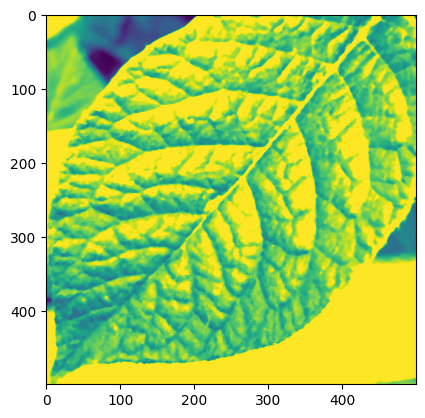

In [31]:
x=[]
y=[]
for cls in classes:
    pth = '/content/drive/MyDrive/Dataset/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j)
        img1 = cv2.resize(img, (500,500))#image resizing
        img1 = cv2.medianBlur(img1, 5)#apply median filter for remove noise
        img1 = img_as_ubyte(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)) #contrast improve
        img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) # Convert the image to grayscale
        ret,img1 = cv2.threshold(img1,127,255,cv2.THRESH_TRUNC) #Threshould technique      



        # Define the parameters for GLCM computation
        distance = 1  # Distance between pixel pairs
        angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # Directions of pixel pairs

        # Compute the GLCM
        glcm = greycomatrix(img1, distances=[distance], angles=angles, levels=256, symmetric=True, normed=True)

        # Extract Haralick features from the GLCM
        contrast = greycoprops(glcm, 'contrast')
        homogeneity = greycoprops(glcm, 'homogeneity')
        energy = greycoprops(glcm, 'energy')
        #entropy = greycoprops(glcm, 'entropy')
        correlation = greycoprops(glcm, 'correlation')

        # Print the extracted Haralick features
        print("Contrast:", contrast)
        print("Homogeneity:", homogeneity)
        print("Energy:", energy)
        #print("Entropy:", entropy)
        print("Correlation:", correlation)

        
        x.append(img1)
        y.append(img)

plt.imshow(x[0]) #image after preprocessing

**Feature extraction**

In [13]:
!pip install scikit-image


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
import numpy as np
from skimage.feature import greycomatrix, greycoprops